In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib.request
import json
import networkx as nx
from fa2 import ForceAtlas2
from itertools import count
from collections import Counter
from itertools import count
from matplotlib.colors import ListedColormap

In [2]:
!pip install lyricsgenius

     |████████████████████████████████| 59 kB 3.0 MB/s 


# Motivation


---



> *If you can’t hurry love, then just be a single ladies!*

> *If you can’t help falling in love, then just be Justin Bieber’s baby?*

> *Music has changed…or have we?*

> *Keep tuned so you won’t miss a beat!*


---


Our project aims to analyse the best music throught time using network and nlp tools learned in the class "Social Graphs and Interactions".  
That data set we will analyse, is based on Rolling Stones' Magazine 2021 list of top 500 songs of all time. Many times before music has been analysed, but we want to see if creative applications of the tools from class can give new insides to the history of music. The list from Rolling Stones' Magazine seems like an appropiate choice to select the 500 greatest songs. See how the songs were chosen in the link below.   
We hope that the reader will get new insights to how music has changed (or has not?) throughout the years.  

In the following we will first do a network analysis of the artists from the top 500 as well as the genres the play.  Later we will make a sentiment analysis of songs from each decade to see how this change through time.    

The top 500 list: https://www.rollingstone.com/music/music-lists/best-songs-of-all-time-1224767/  
How is the list made: https://www.rollingstone.com/music/music-news/500-greatest-songs-voters-list-1225358/  

# Content
- Get data
- Overview of data
- Graph of all artists on the top 500
- Graph of artists for each decade
- Graph of all genres on the top 500
- Graph of genres for each decade
- Extract songs from each artist of the list
- Study of words 
    - Uniqueness of words
    - Most used words
    - Sentiment Analysis

# Contributon
We helped each other, but the main responsibilities were:  
- Haonan: Webpage construction + Text analysis(sentiment analysis)
- Sarah: Movie + Text analysis(word cloud + community analysis) + Webpage content creativity  
- Mads: Network analysis + extracting genres from wiki  

# Basic stats and getting the data

We used the following excel file containing the songs, the artists, the year, and the rank on the top 500.  
We then extracted genre information from the artists Wikipedia pages. Some pages were not easy to access automatically. So we found the page names corresponding to the artists ourselves.  


## Get list of artists on the top 500 songs of all time

In [3]:
all_artists = pd.read_excel('top500songs.xlsx')

In [4]:
all_artists.head()

Rank                     Song           Artist  Year
0     1                  Respect  Aretha Franklin  1967
1     2          Fight the Power     Public Enemy  1989
2     3   A Change is Gonna Come        Sam Cooke  1964
3     4     Like a Rolling Stone        Bob Dylan  1965
4     5  Smells Like Teen Spirit          Nirvana  1991

## Wikipedia API

Function to extract artist page from Wikipedia

In [5]:
def get_artist_wikipedia(char, counter):
    counter = counter + 1
    if(counter > 3):
        return([])
    if(char == 'Nirvana'):
        char = 'Nirvana_(band)'
    if(char == 'Guns ‘N’ Roses'):
        char = 'Guns_N%27_Roses'
    if(char == 'Guns ‘n’ Roses'):
        char = 'Guns_N%27_Roses'
    if(char == 'Beach Boys'):
        char = 'The_Beach_Boys'
    if(char == 'Stones'):
        char = 'The_Rolling_Stones'
    #if(char == 'Rolling Stones'):
     #   char = 'The_Rolling_Stones'
    if(char == 'Ronettes'):
        char = 'The_Ronettes'
    if(char == 'Queen'):
        char = 'Queen_(band)' 
    if(char == 'Notorious B.I.G.'):
        char = 'The_Notorious_B.I.G.'
    if(char == 'Prince'):
        char = 'Prince_(musician)'
    if(char == 'M.I.A.'):
        char = 'M.I.A._(rapper)'
    if(char == 'Earth, Wind & Fire'):
        char = 'Earth,_Wind_%26_Fire'
    if(char == 'Simon and Garfunkel'):
        char = 'Simon_%26_Garfunkel'
    if(char == 'Chic'):
        char = 'Chic_(band)'
    if(char == 'The Four Tops'):
        char = 'Four Tops'
    if(char == 'Impressions'):
        char = 'The_Impressions'
    if(char == 'Drake'):
        char = 'Drake_(musician)'
    if(char == 'Eric B. and Rakim'):
        char = 'Eric_B._%26_Rakim'
    if(char == 'The Kinsgmen'):
        char = 'The Kingsmen'
    if(char == 'Meters'):
        char = 'The_Meters'
    if(char == 'Ike and Tina Turner'):
        char = 'Ike_%26_Tina_Turner'
    if(char == 'Crosby, Stills & Nash'):
        char = 'Crosby,_Stills,_Nash_%26_Young'
    if(char == 'Destiny’s Child'):
        char = 'Destiny%27s_Child'
    if(char == 'Hall and Oates'):
        char = 'Hall_%26_Oates'
    if(char == 'Zombies'):
        char = 'The_Zombies'
    if(char == 'Drifters'):
        char = 'The_Drifters'
    if(char == 'Allman Brother’s Band'):
        char = 'The_Allman_Brothers_Band'
    if(char == 'Queen and David Bowie'):
        char = 'Queen' # also David Bowie
    if(char == 'Peter Rock and CL Smooth'):
        char = 'Pete_Rock_%26_CL_Smooth'
    if(char == 'Megan Thee Stallion feat. Beyonce'):
        char = 'Megan_Thee_Stallion' # also Beyonce
    if(char == 'D’Angelo'):
        char = 'D%27Angelo' 
        
    if(char == 'Usher'):
        return(['R&B', 'pop'])
    if(char == 'Sylvester'):
        return(['Dance', 'Hi-NRG', 'R&B', 'disco', 'soul', 'funk'])
    if(char == 'Booker T'):
        return(['R&B', 'Memphis', 'soul', 'funk', 'Southern soul', 'soul jazz', 'instrumental rock'])
    if(char == 'Mazzy Star'):
        return(['Alternative rock', 'blues rock', 'dream pop', 'folk', 'neo-psychedelia'])
    if(char == 'Dixie Chicks'):
        return(['Country', 'americana', 'alternative country', 'folk', 'bluegrass', 'country pop'])
    if(char == 'Solange'):
        return(['R&B', 'pop', 'hip hop', 'funk', 'soul'])
    if(char == 'Nilsson'):
        return(['Rock', 'pop'])
    
    if(char == 'Beyonce'):
        return(['R&B', 'pop', 'hip hop', 'soul'])
    if(char == 'Sinead O’Connor'):
        return(['Alternative rock', 'pop rock', 'folk rock'])
    if(char == 'Howlin’ Wolf'):
        return(['Blues', 'Chicago blues', 'electric blues'])
    if(char == 'UKG'):
        return(['Hip hop', 'Southern hip hop', 'country rap'])
    if(char == 'Motorhead'):
        return(['Heavy metal', 'rock and roll', 'hard rock', 'speed metal'])
    if(char == 'Blue Oyster Cult'):
        return(['Hard rock', 'heavy metal', 'occult rock', 'progressive rock', 'psychedelic rock', 'acid rock'])


    
    char = char.replace(" ", "_")
    baseurl = "https://en.wikipedia.org/w/api.php?" # "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = f"titles={char}"
    content = "prop=revisions&rvprop=content&rvslots=*"
    dataformat ="format=json"

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    #print(query)
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    artist_dict = json.loads(wikitext)
    if(len(str(artist_dict)) < 187):
        if('#REDIRECT' not in artist_dict):
            if('#redirect' not in artist_dict):
                #print(char)
                if('_(band)' not in char):
                    char_new = 'The_' + char
                else:
                    char_new = 'The_' + re.findall(r'[\s\S]*[^_(band)]', char)[0]
                #print(char_new)
                return(get_artist_wikipedia(char_new, counter))
    #if('ns' in list(artist_dict['query']['pages'].values())[0]):
    #    char_new = 'The_' + char
    #    return(get_artist_wikipedia(char_new))
    artist_page = list(artist_dict['query']['pages'].values())[0]['revisions'][0]['slots']['main']['*']
    if('#REDIRECT' in artist_page):
        redirected_page = re.findall(r'#REDIRECT\s*\[\[([^\]]*)\]\]', artist_page) # \s*\[\[\s\S\]\]
        return(get_artist_wikipedia(redirected_page[0], counter))
    if('#redirect' in artist_page):
        redirected_page = re.findall(r'#redirect\s*\[\[([^\]]*)\]\]', artist_page) # \s*\[\[\s\S\]\]
        return(get_artist_wikipedia(redirected_page[0], counter))
    if(f'[[{char} (band)]]' in artist_page):
        char_new = char + '_(band)'
        return(get_artist_wikipedia(char_new, counter))
    return(artist_page)

In [6]:
genres = [None]*500

In [7]:
for i in range(500): # should be 500, but right not only works up till 284(now it can work up till 335)
    artist_page = get_artist_wikipedia(all_artists.Artist[i], 0)
    if(type(artist_page)!=list):
        genre_text = re.findall(r'[Gg]enre\s*\=[\s\S]*?=', artist_page)
        if(len(genre_text)==0):
            char = all_artists.Artist[i]
            char = char + '_(band)' # (musician)
            artist_page = get_artist_wikipedia(char, 1)
            if(type(artist_page)!=list):
                genre_text = re.findall(r'genre\s*\=[\s\S]*?=', artist_page)
        if(type(artist_page)!=list):
            genre = re.findall(r'\[\[([\w\s\|\&]*?)\]\]', genre_text[0])
            genres[i] = genre
    else:
        genres[i] = []

Some genres are on the form "genre music"|genre. We turn these into "genre".
Convert to lower case.

In [8]:
genres2 = genres.copy()
for i in range(500):
    sublist = genres2[i]
    if(sublist is not None):
        if(len(sublist)>0):
            for j in range(len(sublist)):
                genres2[i][j] = genres2[i][j].lower()
                if("|" in genres2[i][j]):
                    genres2[i][j] = genres2[i][j].partition("|")[2]

# Overview of data

Make a list of all genres with repetitions:

In [9]:
flat_list_2 = [item for sublist in genres2 for item in sublist]

Number of unique genres:

In [10]:
nr_unique_genres = len(set(flat_list_2))
nr_unique_genres

196

Count each genre (i.e. the number of artists playing that gerne) and print the top genres.

In [11]:
dicti=Counter(flat_list_2)
pd_df = pd.DataFrame(list(dicti.items()))
pd_df.columns =["Dim","Count"]
# sort df by Count column
pd_df = pd_df.sort_values(['Count']).reset_index(drop=True)

print(pd_df[(nr_unique_genres-20):nr_unique_genres])

                  Dim  Count
176          art rock     20
177       psychedelia     21
178         punk rock     23
179             disco     26
180              jazz     28
181          new wave     30
182              folk     32
183          pop rock     34
184         hard rock     38
185            gospel     39
186           country     39
187              funk     39
188     rock and roll     40
189  alternative rock     40
190             blues     44
191           hip hop     56
192              soul     88
193               r&b    111
194              rock    114
195               pop    127


Plot count of each genre:

In [12]:
print("We found a total of  {} different genres!".format(len(pd_df)))

We found a total of  196 different genres!


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


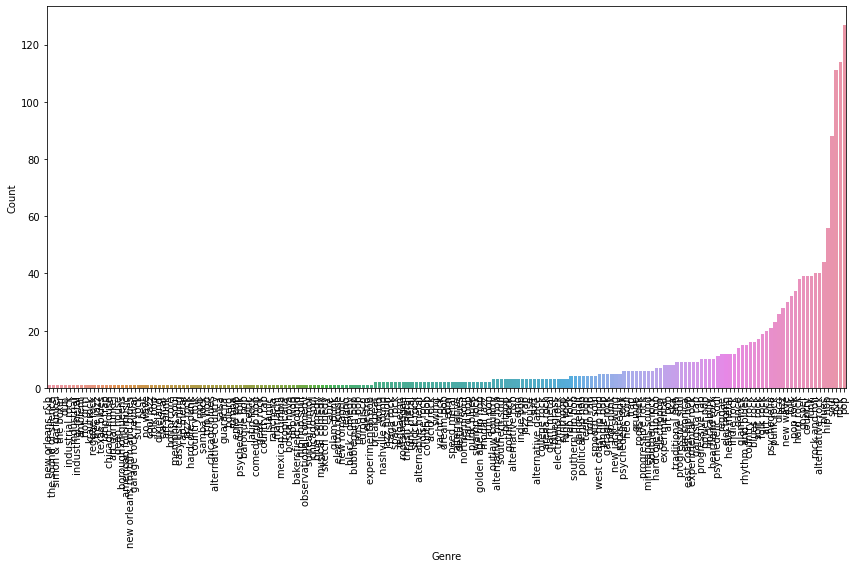

In [13]:
plt.figure(figsize=(12,8))
# plot barh chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.Count)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Genre", ylabel='Count')
# add proper Dim values as x labels
ax.set_xticklabels(pd_df.Dim)
for item in ax.get_xticklabels(): item.set_rotation(90)
#for i, v in enumerate(pd_df["Count"].iteritems()):        
#    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

Its hard to read all of them, so here we examine the genres played by at least 10 artists:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


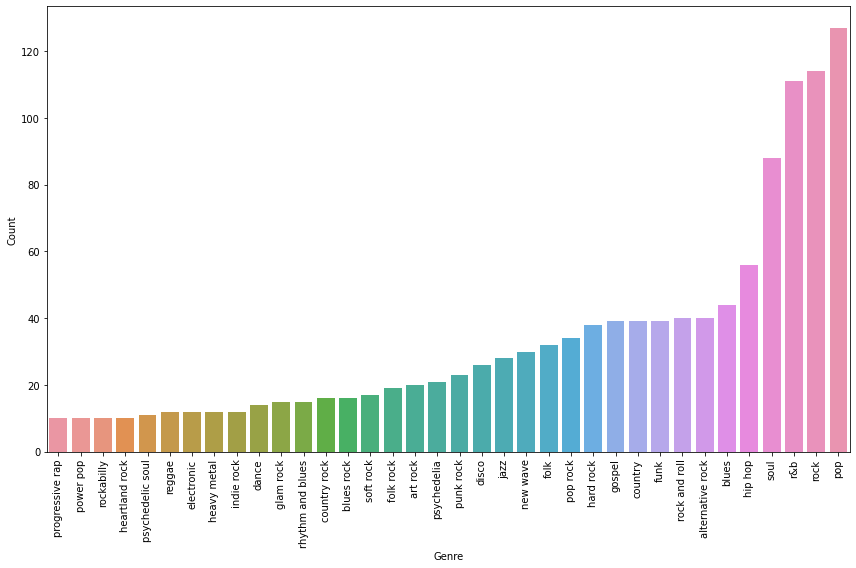

In [14]:
pd_df_only_top = pd_df[pd_df.Count >= 10]

plt.figure(figsize=(12,8))
# plot barh chart with index as x values
ax = sns.barplot(pd_df_only_top.index, pd_df_only_top.Count)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Genre", ylabel='Count')
# add proper Dim values as x labels
ax.set_xticklabels(pd_df_only_top.Dim)
for item in ax.get_xticklabels(): item.set_rotation(90)
#for i, v in enumerate(pd_df_only_top["Count"].iteritems()):        
#    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

In [15]:
artists_sub = all_artists.copy()
artists_sub['genre'] = genres2

# Graph of all artists on the top 500

We are interested to see how the artists connect through the genres they play.  
We color the nodes, first by year (of the songs), then by rank.  
Do we see any tendencies in the graph? Are there any groupings indicated by year or rank?  

We fit the graph using the networkx library and plot it.  

Create graph with nodes and edges. as we are interested from the 60's and upwards we will first elliminate the songs older than this decade.

In [16]:
artists_sub = artists_sub[artists_sub['Year']>=1960]
artists_sub = artists_sub[artists_sub['Year']<2020]
artists_sub = artists_sub.reset_index()

In [17]:
G = nx.Graph()
G.add_nodes_from(artists_sub['Artist'])
nodes_in_graph = list(G.nodes())
N = len(nodes_in_graph)
for i in range(N):
    links = []
    node = nodes_in_graph[i]
    genres = artists_sub['genre'][i]
    for j in range(N):
        if(j!=i):
            genresB = artists_sub['genre'][j]
            if(any(map(lambda v: v in genresB, genres))):
                edge_attr = [w for w in genres if w in genresB] # new
                # links.append(nodes_in_graph[j])
                count_edge_attr = pd_df.loc[pd_df['Dim'].isin(edge_attr)]
                edge_attr_single = count_edge_attr.nlargest(1, columns=['Count']).iloc[0,0]
                new_edge = nodes_in_graph[j] # new
                #new_edge = [(node, new_edge, {'genre' : edge_attr_single})] # new
                G.add_edge(node, new_edge, genre = edge_attr_single)
                #G.add_edges_from(new_edges) # new
    # new_edges = [(node, new_edge) for new_edge in links]
    # G.add_edges_from(new_edges)

Add Year and Rank attributes

In [18]:
year_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Year']].iterrows()}
nx.set_node_attributes(G, year_attribute, name="Year")

rank_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Rank']].iterrows()}
nx.set_node_attributes(G, rank_attribute, name="Rank")

Giant connected component

In [19]:
#G_giant = G.subgraph(list(nx.connected_components(G))[0])
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G_giant = G.subgraph(Gcc[0])
d = dict(G_giant.degree)

Plot graph

In [20]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=20.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

In [21]:
positions = forceatlas2.forceatlas2_networkx_layout(G_giant, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:03<00:00, 530.08it/s]

BarnesHut Approximation  took  1.31  seconds
Repulsion forces  took  1.50  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.52  seconds
AdjustSpeedAndApplyForces step  took  0.15  seconds


In [22]:
colorYear = list(nx.get_node_attributes(G_giant,'Year').values())
colorRank = list(nx.get_node_attributes(G_giant,'Rank').values())



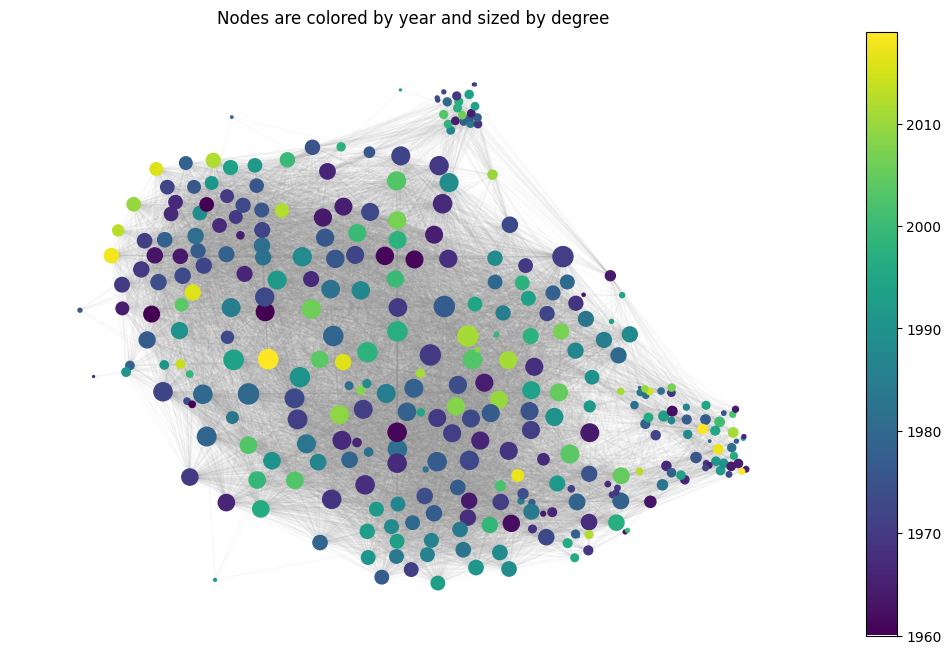

In [23]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, label = list(G_giant.nodes), 
                            node_color=colorYear, alpha=1, node_size=[v for v in d.values()])
nx.draw_networkx_edges(G_giant, positions, alpha = 0.05, edge_color='grey')
#nx.draw_networkx_labels(G_giant, positions, nx.get_node_attributes(G_giant,'Rank'), font_size = 6, alpha = 0.4)
plt.colorbar(nc)
plt.axis('off')
plt.title('Nodes are colored by year and sized by degree')
plt.show()

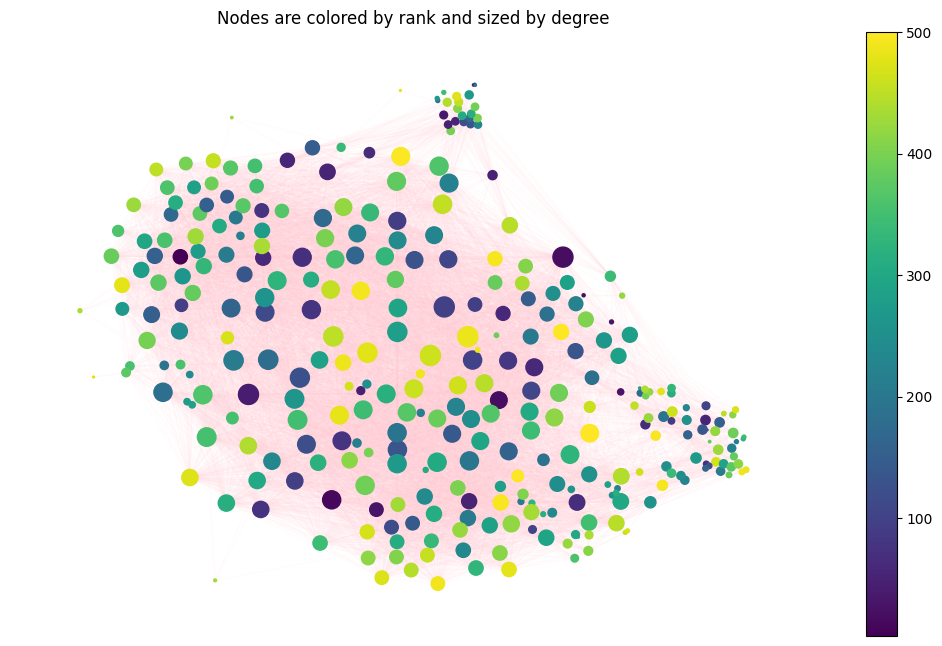

In [24]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorRank, alpha=1, node_size=[v for v in d.values()])
nx.draw_networkx_edges(G_giant, positions, alpha = 0.05, edge_color='pink')
plt.colorbar(nc)
plt.title('Nodes are colored by rank and sized by degree')
plt.axis('off')
plt.show()

The graph is very conected, and it is hard to see any groupings of nodes, except a few.  
There does not seem to be any striking grouping in the graph representing rank or year.  
This indicates that the there has not been large changes in what combination of genres the top artists have played throughout the year. This might be due to the fact that the songs were picked in recent time.   

## Centrality

In this section we explore degree centrality and betweenness centrality of the graph as described in the Network Science Book.


http://networksciencebook.com/

Degree centrality indicates how close in genre an artist is to the rest. A low degree centrality indicates that an artist is very different in terms of genre compared to the rest, while a high degree centrality indicates that an artist plays genres that are close to what others are playing.  

In [25]:
degree_centrality = nx.degree_centrality(G_giant)

The artists with the highest degree centrality are:

In [26]:
high_deg_cen = list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:6]
artists_sub[artists_sub.Artist.isin(high_deg_cen)]

index  Rank  ...  Year                                              genre
18      18    19  ...  1971                          [rock, pop, experimental]
37      40    41  ...  1980                                      [gothic rock]
92      98    99  ...  1977                [pop, soul, disco, rock, soft rock]
165    177   178  ...  2019             [pop, electropop, teen pop, indie pop]
432    461   462  ...  1970  [rock, r&b, folk, blues, soul, celtic, jazz, s...
454    484   485  ...  2011                                          [hip hop]

[6 rows x 6 columns]

Centrality per decade 

In [27]:
high_deg_cen = list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:100]
decade_60 = artists_sub[artists_sub.Artist.isin(high_deg_cen)]
decade_60 = decade_60[decade_60["Year"]<1970]
decade_60.head()

index  Rank  ...  Year                                              genre
3       3     4  ...  1965  [folk, blues, rock, gospel, country, tradition...
6       6     7  ...  1967                           [rock, pop, psychedelia]
10     10    11  ...  1966                     [rock, pop, surf, psychedelia]
12     12    13  ...  1969       [rock, blues, pop, hard rock, rock and roll]
13     13    14  ...  1967                                        [rock, pop]

[5 rows x 6 columns]

The artists with the lowest degree centrality are:

In [28]:
low_deg_cen = list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=False)))[0:5]
artists_sub[artists_sub.Artist.isin(low_deg_cen)]

index  Rank  ...  Year                                              genre
41      44    45  ...  2015               [hip hop, progressive rap, jazz rap]
81      86    87  ...  2007  [electronic rock, electronica, indie rock, art...
164    176   177  ...  1983                                                 []
277    295   296  ...  1996          [punk rock, alternative rock, riot grrrl]
443    472   473  ...  1968                         [country, nashville sound]

[5 rows x 6 columns]

Betweennes centrality is high if a node is often present in the shortest path for two other nodes.  
Betweennes centrality is high if an artist combines popular genres, that is rarely combined, and low if the artist playes few or unpopular genres.

In [29]:
betweenness_centrality = nx.betweenness_centrality(G_giant)

In [30]:
high_bet_cen = list(dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5]
artists_sub[artists_sub.Artist.isin(high_bet_cen)]

index  Rank  ...  Year                                              genre
171    183   184  ...  1990                                                 []
252    269   270  ...  1994  [industrial rock, industrial, alternative rock...
311    333   334  ...  1970                                             [rock]
319    341   342  ...  1964                  [rock and roll, rhythm and blues]
339    363   364  ...  1970                                             [rock]
425    454   455  ...  1967  [psychedelic rock, acid rock, folk rock, garag...

[6 rows x 6 columns]

In [31]:
low_bet_deg = list(dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=False)))[0:5]
[artists_sub.Artist.isin(low_bet_deg)]

[0      False
 1       True
 2      False
 3      False
 4      False
        ...  
 464    False
 465    False
 466    False
 467    False
 468    False
 Name: Artist, Length: 469, dtype: bool]

In the list of high degree centrality some artists play popylar genres like pop and R&B, while another only plays gothic rock, which was unexpected.  

Some of the artists with a low betweennes centrality only play a single genre, which obviously gives a low betweennes centrality. Artists with a high betweennes centrality seem to combine unpopular genres with more popular once like rock, hip hop, and R&B.

## Statistics of the graph

We calculate some basic statistics for the graph. The statistics is for the graph containing all nodes (not just the largest connected component).

The number of nodes is

In [32]:
G.number_of_nodes()

348

The number of edges is

In [33]:
G.number_of_edges()

14237

The average degree is

In [34]:
round(2*G.number_of_edges()/G.number_of_nodes(),2)

81.82

Degree distribution

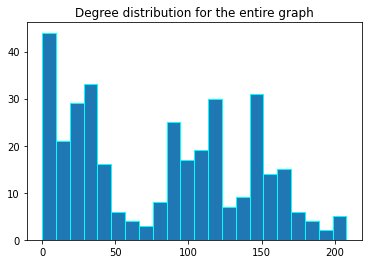

In [35]:
degrees = sorted(d for n, d in G.degree())
out1, out2 = np.histogram(degrees, bins=22)
bin_means = [np.mean(out2[i:(i+2)]) for i in range(len(out2)-1)]
width = out2[1]-out2[0]
plt.bar(bin_means, out1, width = width, edgecolor = "cyan")
plt.title("Degree distribution for the entire graph")
plt.show()

The average degree is rather high, which was also indicated by the graph plot above. The degree distribution also shows that many artists are extreamly well connected. This is due to the fact that many play the same popular genres, and often in combination. Therefore the centrality measures might be hard to interpret as many nodes are well connected.  

## Graph using only the most popular genres

Here we only look at the genres present in more than 40 artists, to examine how thise connect. We color the edges according to the gernre, they share. If they share multiple genres, we color by the most popular genre.

In [36]:
subgenres_high = list(pd_df[pd_df['Count']>40]['Dim'])
subgenres = subgenres_high
subgenres

['blues', 'hip hop', 'soul', 'r&b', 'rock', 'pop']

In [37]:
G_popular = nx.Graph()
G_popular.add_nodes_from(artists_sub['Artist'])
nodes_in_graph = list(G_popular.nodes())
N = len(nodes_in_graph)
for i in range(N):
    links = []
    node = nodes_in_graph[i]
    genres = [g for g in list(artists_sub['genre'][i]) if g in subgenres]
    for j in range(N):
        if(j!=i):
            genresB = [g for g in list(artists_sub['genre'][j]) if g in subgenres]
            if(any(map(lambda v: v in genresB, genres))):
                edge_attr = [w for w in genres if w in genresB] # new
                count_edge_attr = pd_df.loc[pd_df['Dim'].isin(edge_attr)]
                edge_attr_single = count_edge_attr.nlargest(1, columns=['Count']).iloc[0,0]
                new_edge = nodes_in_graph[j] # new
                G_popular.add_edge(node, new_edge, genre = edge_attr_single)

In [38]:
year_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Year']].iterrows()}
nx.set_node_attributes(G_popular, year_attribute, name="Year")

rank_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Rank']].iterrows()}
nx.set_node_attributes(G_popular, rank_attribute, name="Rank")

In [39]:
Gcc = sorted(nx.connected_components(G_popular), key=len, reverse=True)
G_giant = G_popular.subgraph(Gcc[0])
d = dict(G_giant.degree)

In [40]:
positions = forceatlas2.forceatlas2_networkx_layout(G_giant, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:02<00:00, 968.85it/s] 

BarnesHut Approximation  took  0.57  seconds
Repulsion forces  took  0.78  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.44  seconds
AdjustSpeedAndApplyForces step  took  0.10  seconds


In [41]:
colorYear = list(nx.get_node_attributes(G_giant,'Year').values())
colorRank = list(nx.get_node_attributes(G_giant,'Rank').values())

In [42]:
# from itertools import count
# get unique groups
groups = set(nx.get_edge_attributes(G_giant,'genre').values())
mapping = dict(zip(sorted(groups),count()))
edges = G_giant.edges(data=True)
colors = [mapping[data['genre']] for n1, n2, data in edges]

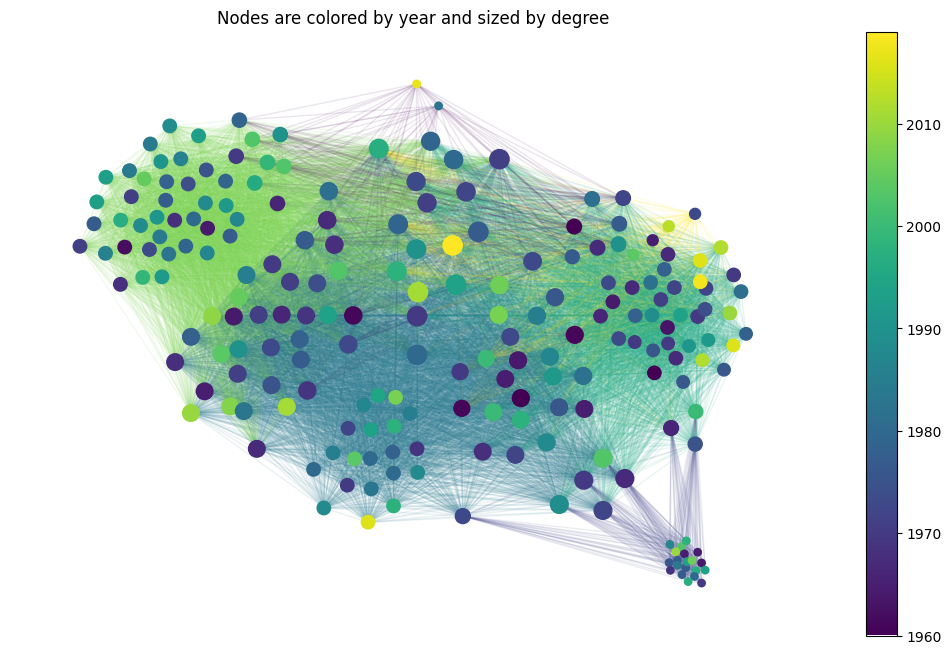

In [43]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorYear, alpha=1, node_size=[v for v in d.values()])
ec = nx.draw_networkx_edges(G_giant, positions, edge_color=colors, alpha = 0.1)
plt.colorbar(nc)
plt.axis('off')
plt.title('Nodes are colored by year and sized by degree')
plt.show()

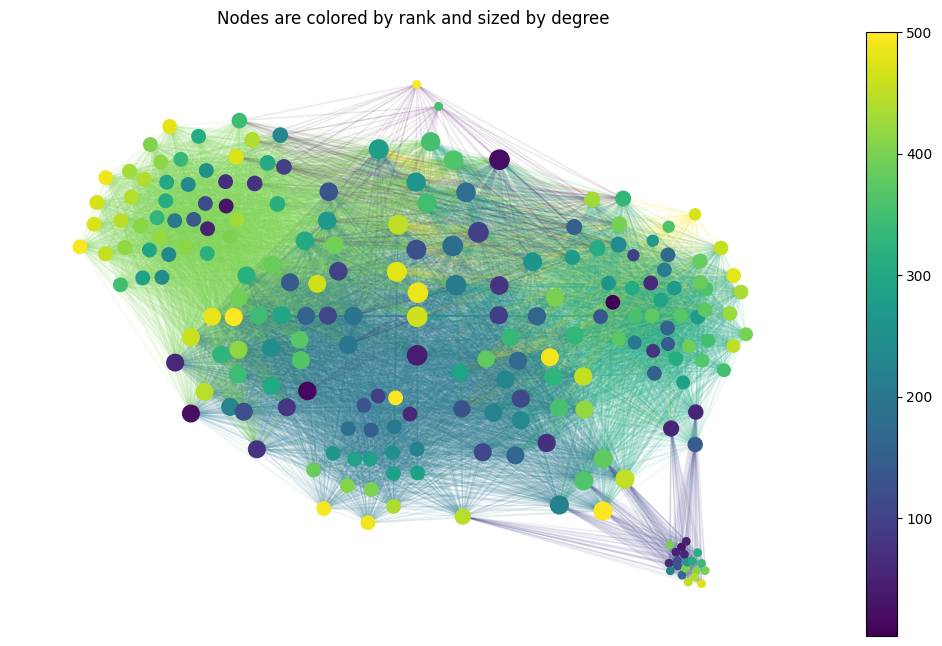

In [44]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorRank, alpha=1, node_size=[v for v in d.values()])
ec = nx.draw_networkx_edges(G_giant, positions, edge_color=colors, alpha = 0.1)
plt.colorbar(nc)
plt.title('Nodes are colored by rank and sized by degree')
plt.axis('off')
plt.show()

As expected these genres seem to be responsible for most of the connections in the graph. The sturecture has not changed a lot since the large graph.  

## Graph using only the least popular genres

Here we only look at the genres present in less than 17 artists, to see how the artists interact through these. We color the edges according to the gernre, they share. If they share multiple genres, we color by the most popular genre.

In [45]:
subgenres_low = list(pd_df[(pd_df['Count']<17)&(pd_df['Count']>1)]['Dim'])
subgenres = subgenres_low
print(subgenres)

['breakbeat', 'world', 'nashville sound', 'jazz fusion', 'raga rock', 'space rock', 'reggaeton', 'roots reggae', 'thrash metal', 'funk metal', 'shock rock', 'alternative metal', 'noise rock', 'country pop', 'acid rock', 'swing', 'yacht rock', 'dream pop', 'edm', 'speed metal', 'alternative', 'delta blues', 'northern soul', 'hard bop', 'punk blues', 'swamp rock', 'golden age hip hop', 'modal jazz', 'latin pop', 'outlaw country', 'alternative hip hop', 'southern soul', 'britpop', 'gothic rock', 'alternative r&b', 'emo', 'indie pop', 'jazz rap', 'house', 'surf', 'alternative dance', 'college rock', 'arena rock', 'glam metal', 'bluegrass', 'electronic rock', 'synthpop', 'funk rock', 'rap rock', 'southern hip hop', 'dancehall', 'political hip hop', 'teen pop', 'pop rap', 'smooth soul', 'west coast hip hop', 'jangle pop', 'garage rock', 'pop punk', 'new jack swing', 'rocksteady', 'psychedelic rock', 'neo soul', 'trap', 'grunge', 'roots rock', 'progressive rock', 'minneapolis sound', 'souther

In [46]:
G_unpopular = nx.Graph()
G_unpopular.add_nodes_from(artists_sub['Artist'])
nodes_in_graph = list(G_unpopular.nodes())
N = len(nodes_in_graph)
for i in range(N):
    links = []
    node = nodes_in_graph[i]
    genres = [g for g in list(artists_sub['genre'][i]) if g in subgenres]
    for j in range(N):
        if(j!=i):
            genresB = [g for g in list(artists_sub['genre'][j]) if g in subgenres]
            if(any(map(lambda v: v in genresB, genres))):
                edge_attr = [w for w in genres if w in genresB] # new
                count_edge_attr = pd_df.loc[pd_df['Dim'].isin(edge_attr)]
                edge_attr_single = count_edge_attr.nlargest(1, columns=['Count']).iloc[0,0]
                new_edge = nodes_in_graph[j] # new
                G_unpopular.add_edge(node, new_edge, genre = edge_attr_single)

In [47]:
year_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Year']].iterrows()}
nx.set_node_attributes(G_unpopular, year_attribute, name="Year")

rank_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Rank']].iterrows()}
nx.set_node_attributes(G_unpopular, rank_attribute, name="Rank")

In [48]:
Gcc = sorted(nx.connected_components(G_unpopular), key=len, reverse=True)
G_giant = G_unpopular.subgraph(Gcc[0])
d = dict(G_giant.degree)

In [49]:
positions = forceatlas2.forceatlas2_networkx_layout(G_giant, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:00<00:00, 2476.11it/s]

BarnesHut Approximation  took  0.25  seconds
Repulsion forces  took  0.36  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.07  seconds


In [50]:
colorYear = list(nx.get_node_attributes(G_giant,'Year').values())
colorRank = list(nx.get_node_attributes(G_giant,'Rank').values())

In [51]:
# get unique groups
groups = set(nx.get_edge_attributes(G_giant,'genre').values())
mapping = dict(zip(sorted(groups),count()))
edges = G_giant.edges(data=True)
colors = [mapping[data['genre']] for n1, n2, data in edges]

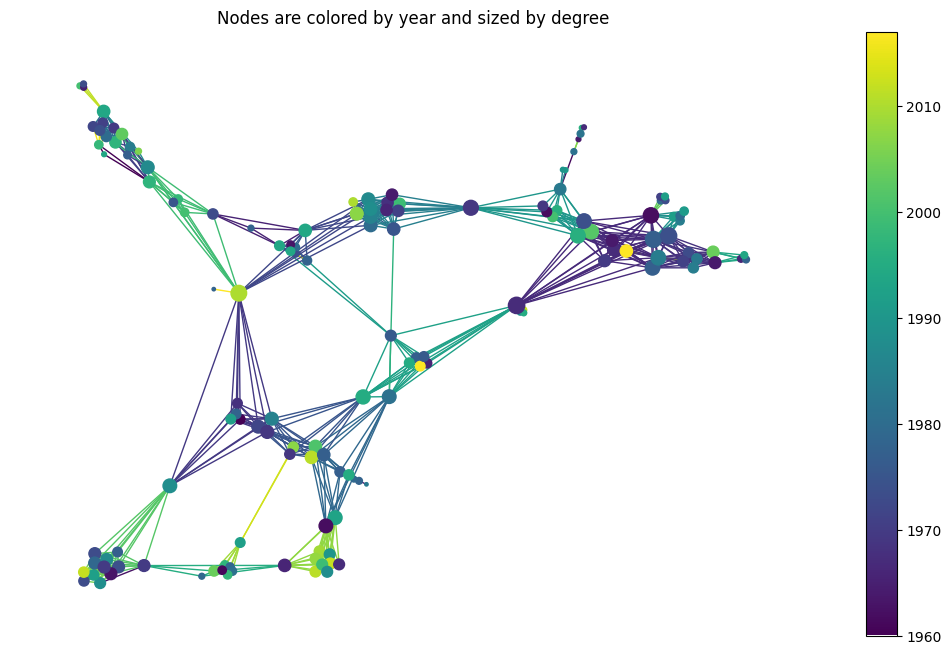

In [52]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorYear, alpha=1, node_size=[v * 6 for v in d.values()])
ec = nx.draw_networkx_edges(G_giant, positions, edge_color=colors, alpha = 1)
plt.colorbar(nc)
plt.axis('off')
plt.title('Nodes are colored by year and sized by degree')
plt.show()

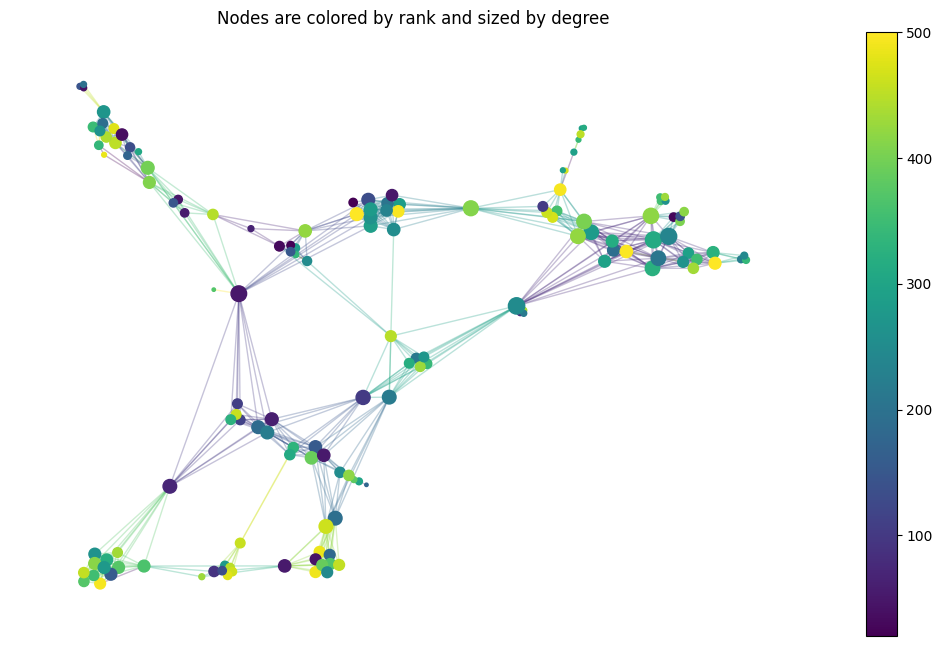

In [53]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorRank, alpha=1, node_size=[v * 6 for v in d.values()])
ec = nx.draw_networkx_edges(G_giant, positions, edge_color=colors, alpha = 0.3)
plt.colorbar(nc)
plt.title('Nodes are colored by rank and sized by degree')
plt.axis('off')
plt.show()

Using only the less popular genres, the artist seem to connect only to specific genres, that others also connect to. We see slightly less of a small world tendency, and more grouping of the artists.  

# Graph of artists for each decade
We make a graph for each decade and calculate some statistics to compare them. We want to explore how the graph differ between decades.

### Distribution of songs over the years

Most songs are between the 1950's and the 2010's. So this is what we will focus on.  

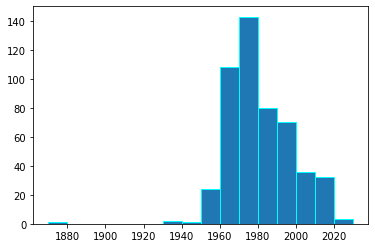

In [54]:
n_bins = int((2030-1870)/10)+1
v = np.linspace(1870, 2030, n_bins)
hist_P, bins_P = np.histogram(all_artists.Year, bins = v)

bins_mean = bins_P[1:]-5
plt.bar(bins_mean, hist_P, width = 10, edgecolor = "cyan")
plt.show()

In [55]:
def plt_graph(graph, xx = 1):
    GccGraph = sorted(nx.connected_components(graph), key=len, reverse=True)
    G_giant_graph = graph.subgraph(GccGraph[0])
    d = dict(G_giant_graph.degree)
    graph = G_giant_graph

    positions = forceatlas2.forceatlas2_networkx_layout(graph, pos=None, iterations=2000)

    colorYear = list(nx.get_node_attributes(graph,'Year').values())
    colorRank = list(nx.get_node_attributes(graph,'Rank').values())

    fig=plt.figure(figsize=(13,8), dpi= 100)
    nc = nx.draw_networkx_nodes(graph, positions, node_color=colorYear, alpha=1, node_size=[v*xx for v in d.values()])
    nx.draw_networkx_edges(graph, positions, alpha = 0.05, edge_color='green')
    plt.colorbar(nc)
    plt.axis('off')
    plt.title('Nodes are colored by year and sized by degree')
    plt.show()

In [56]:
def get_stats(graph):
    n_nodes = graph.number_of_nodes()
    n_edges = graph.number_of_edges()
    avg_deg = round(2*graph.number_of_edges()/graph.number_of_nodes(),2)
    print(f"Number of nodes: {n_nodes}")
    print(f"Number of edges: {n_edges}")
    print(f"Average degree: {avg_deg}")
    return([n_nodes, n_edges, avg_deg])

### The 60's

Number of nodes: 70
Number of edges: 516
Average degree: 14.74


100%|██████████| 2000/2000 [00:00<00:00, 6156.60it/s]


BarnesHut Approximation  took  0.09  seconds
Repulsion forces  took  0.13  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


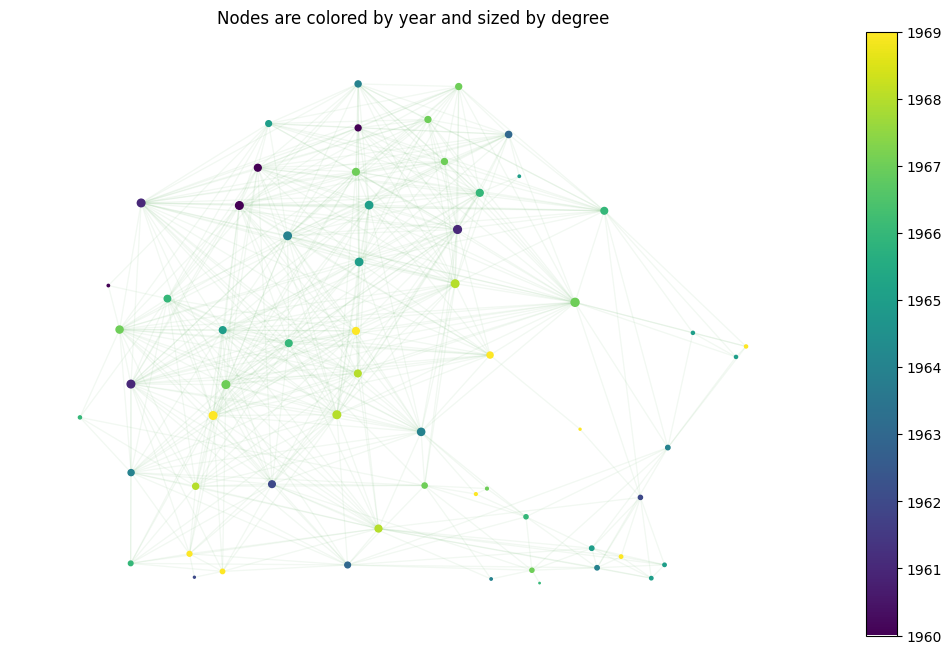

In [57]:
# Get artists from the 80s
artists_60s = [n for n,v in G.nodes(data=True) if ((v['Year'] >= 1960) &(v['Year'] < 1970))]

# Extract subgraph
G_60s = G.subgraph(artists_60s)

# Stats
stat_60 = get_stats(G_60s)

# Plot graph
plt_graph(G_60s)

### The 70's

Number of nodes: 102
Number of edges: 1538
Average degree: 30.16


100%|██████████| 2000/2000 [00:00<00:00, 3443.20it/s]


BarnesHut Approximation  took  0.14  seconds
Repulsion forces  took  0.26  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.06  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


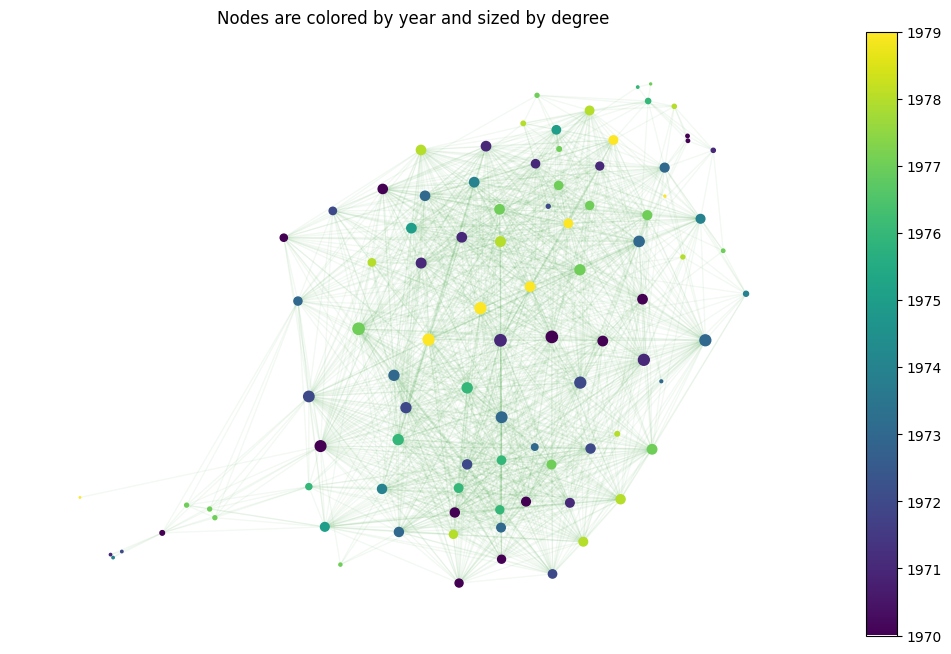

In [58]:
# Get artists from the 70s
artists_70s = [n for n,v in G.nodes(data=True) if ((v['Year'] >= 1970) &(v['Year'] < 1980))]

# Extract subgraph
G_70s = G.subgraph(artists_70s)

# Stats
stat_70 = get_stats(G_70s)

# Plot graph
plt_graph(G_70s)

### The 80's

Number of nodes: 58
Number of edges: 387
Average degree: 13.34


100%|██████████| 2000/2000 [00:00<00:00, 6750.85it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.13  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


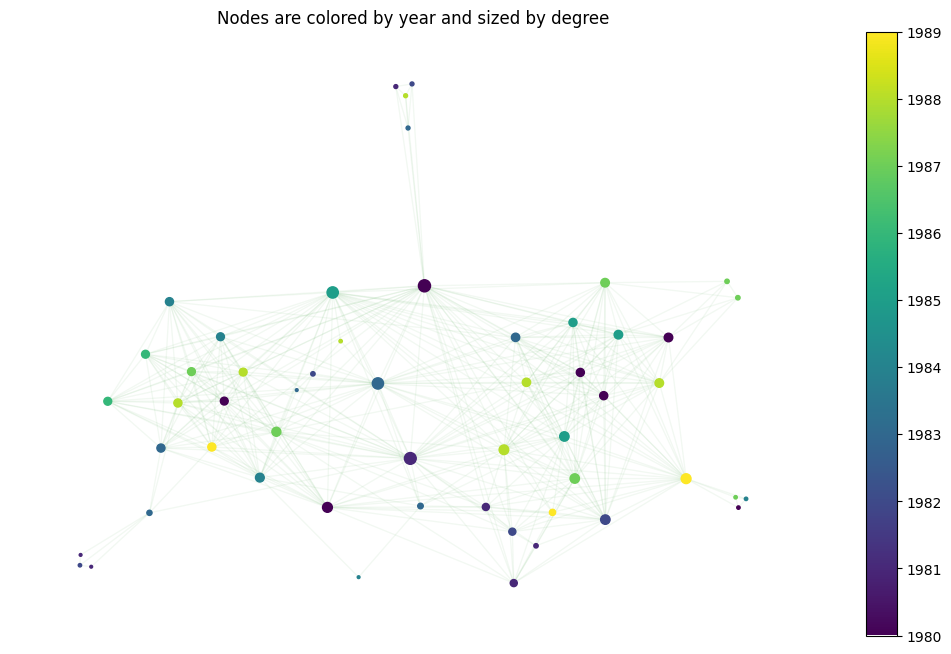

In [59]:
# Get artists from the 80s
artists_80s = [n for n,v in G.nodes(data=True) if ((v['Year'] >= 1980) &(v['Year'] < 1990))]

# Extract subgraph
G_80s = G.subgraph(artists_80s)

# Stats
stat_80 = get_stats(G_80s)

# Plot graph
plt_graph(G_80s, xx=2)

### The 90's

Number of nodes: 62
Number of edges: 331
Average degree: 10.68


100%|██████████| 2000/2000 [00:00<00:00, 6989.15it/s]


BarnesHut Approximation  took  0.08  seconds
Repulsion forces  took  0.12  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


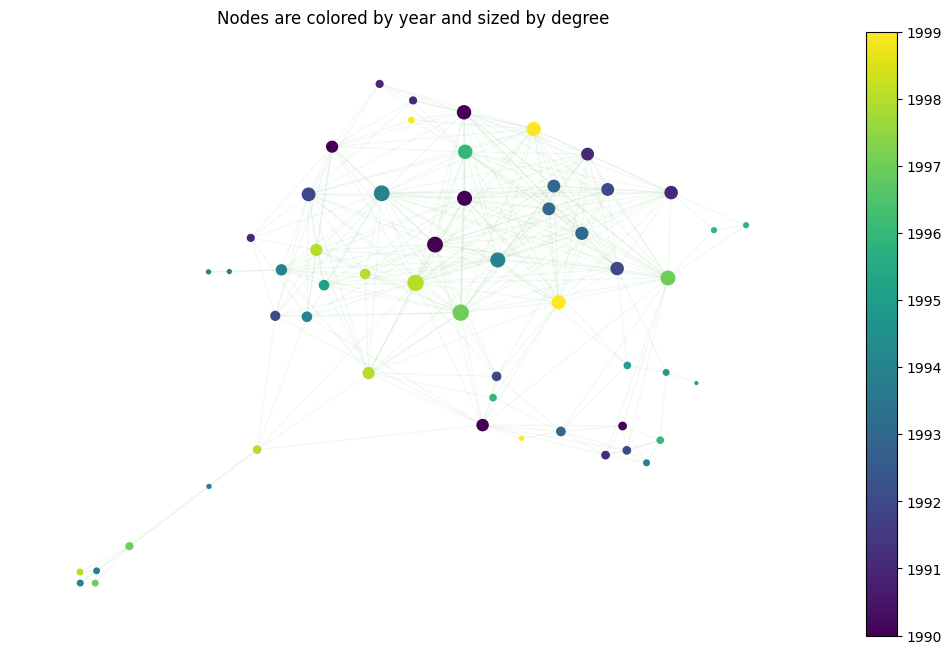

In [60]:
# Get artists from the 80s
artists_90s = [n for n,v in G.nodes(data=True) if ((v['Year'] >= 1990) &(v['Year'] < 2000))]

# Extract subgraph
G_90s = G.subgraph(artists_90s)

# Stats
stat_90 = get_stats(G_90s)

# Plot graph
plt_graph(G_90s, xx=4)

### The 2000's

Number of nodes: 29
Number of edges: 114
Average degree: 7.86


100%|██████████| 2000/2000 [00:00<00:00, 16762.80it/s]

BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.04  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


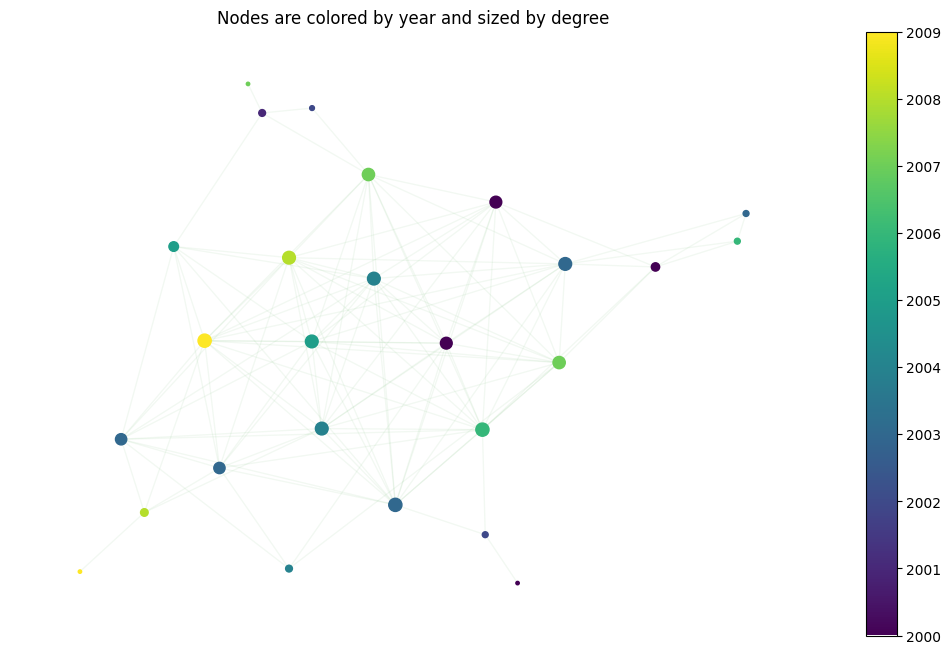

In [61]:
# Get artists from the 80s
artists_00s = [n for n,v in G.nodes(data=True) if ((v['Year'] >= 2000) &(v['Year'] < 2010))]

# Extract subgraph
G_00s = G.subgraph(artists_00s)

# Stats
stat_00 = get_stats(G_00s)

# Plot graph
plt_graph(G_00s, xx=6)

### The 2010's

Number of nodes: 27
Number of edges: 67
Average degree: 4.96


100%|██████████| 2000/2000 [00:00<00:00, 22018.38it/s]

BarnesHut Approximation  took  0.03  seconds
Repulsion forces  took  0.03  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


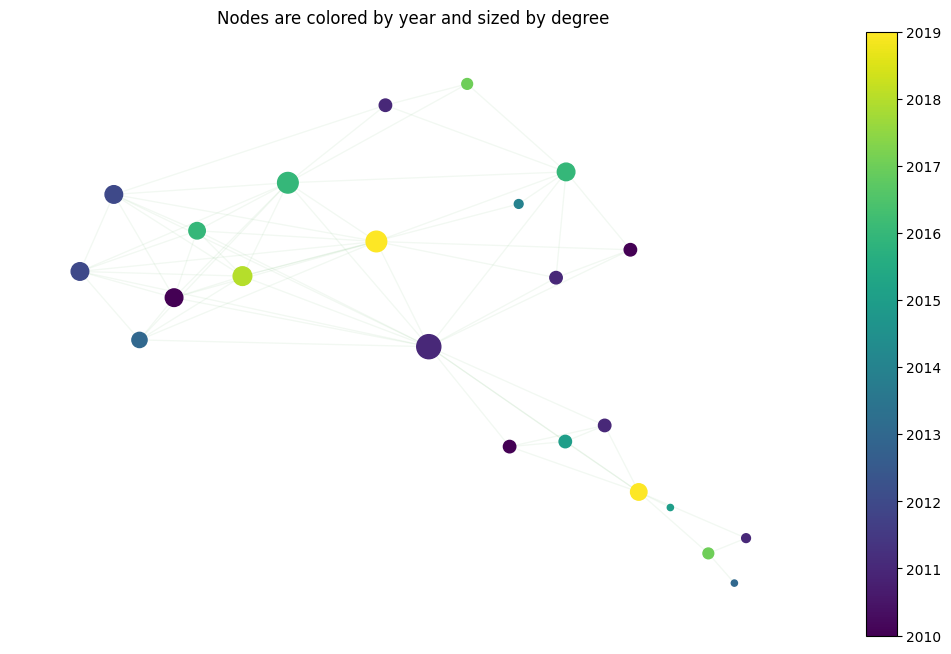

In [62]:
# Get artists from the 80s
artists_10s = [n for n,v in G.nodes(data=True) if ((v['Year'] >= 2010) &(v['Year'] < 2020))]

# Extract subgraph
G_10s = G.subgraph(artists_10s)

# Stats
stat_10 = get_stats(G_10s)

# Plot graph
plt_graph(G_10s, xx=20)

In [63]:
stat_decades = pd.DataFrame({'60' : stat_60, '70' : stat_70, '80' : stat_80, 
                             '90' : stat_90, '00' : stat_00, '10' : stat_10})

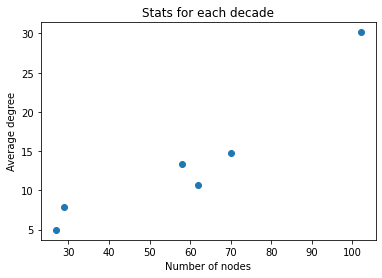

In [64]:
plt.scatter(stat_decades.iloc[0,:], stat_decades.iloc[2,:])
plt.title('Stats for each decade')
plt.xlabel('Number of nodes')
plt.ylabel('Average degree')
plt.show()

Average degree increases as the number of nodes increases. This makes sense, as the more songs there are from a decade, the higher is the probability that a genre is shared by at least two songs. It is hard to distinguish the graphs as the number of nodes differs and the degree follows linearly.  
However, it seems like the list prioritizes music between 1960-1999.  

# Graph for genres
Next, we want to explore how the genres connect. We make a graph with genres as nodes and draw an edge if two genres are played by at least one artist.  
We use the same tools as above.  

In [65]:
G_genre = nx.Graph()
G_genre.add_nodes_from(flat_list_2)

In [66]:
nodes_in_graph = list(G_genre.nodes())
N = len(nodes_in_graph)
for i in range(N):
    genres_i = artists_sub.genre[i]
    K = len(genres_i)
    if(K>1):
        for j in range(K):
            for k in range(j+1,K):
                if(genres_i[j] != genres_i[k]):
                    G_genre.add_edge(genres_i[j], genres_i[k])

In [67]:
G_genre_CC = sorted(nx.connected_components(G_genre), key=len, reverse=True)
G_genre_giant = G_genre.subgraph(G_genre_CC[0])
d = dict(G_genre_giant.degree)

In [68]:
positions = forceatlas2.forceatlas2_networkx_layout(G_genre_giant, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:00<00:00, 2847.42it/s]

BarnesHut Approximation  took  0.17  seconds
Repulsion forces  took  0.38  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


In [69]:
K = 15
genres_pop = {k:v for (k,v) in dict(G_genre_giant.degree).items() if v>K}
names_genres_pop = {k:k for (k,v) in genres_pop.items()}
popular_genres = list(genres_pop.keys())
bob = G_genre_giant.subgraph(popular_genres)

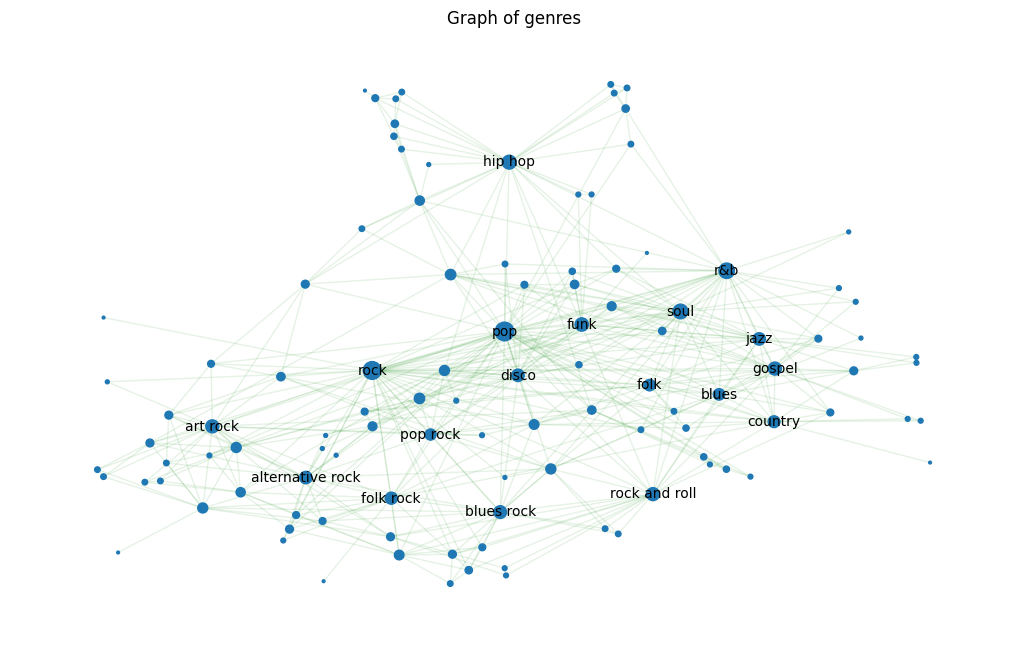

In [70]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nx.draw_networkx_nodes(G_genre_giant, positions, node_size=[v*4 for v in d.values()])
#nx.draw_networkx_nodes(bob, positions, label = list(G_genre_giant.nodes), 
#                            node_color='red', alpha=1, node_size=20)
nx.draw_networkx_labels(bob, positions, names_genres_pop, font_size = 10)

nx.draw_networkx_edges(G_genre_giant, positions, alpha = 0.1, edge_color='green')
plt.axis('off')
plt.title('Graph of genres')
plt.show()

We see that rock-like genres are located in the lower-left part of the graph. Classic genres like jazz, blues, and gospel are located to the right, while more modern gernes like hip hop, electronic, pop, dance, and funk are in the top. Hence it seems like the genres mostly connect to similar genres. There is however, edges breaking the tendency indicating that many artists combine genres from different areas.  

## Centrality for genre graph

Degree centrality indicates how close a genere is to the rest in a specific sense. A low degree centrality indicates, that a genre rarely combined with other genres, while a high degree centrality indicates that a genre that is often combined with other genres, that are also often combined with the rest.  

We expect betweenness centrality to indicate if a genre is combined with other genres that are not combined.

In [71]:
degree_centrality = nx.degree_centrality(G_genre_giant)

The genres with the highest degree centrality are:

In [72]:
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

['pop', 'rock', 'r&b', 'soul', 'hip hop']


The genres with the lowest degree centrality are:

In [73]:
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=False)))[0:5])

['west coast hip hop', 'britpop', 'garage rock revival', 'new orleans r&b', 'folk pop']


In [74]:
betweenness_centrality = nx.betweenness_centrality(G_genre_giant)

The gernes with the highest betweenness centrality:

In [75]:
print(list(dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

['pop', 'hip hop', 'rock', 'r&b', 'art rock']


The gernes with the lowest betweenness centrality:

In [76]:
print(list(dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=False)))[0:5])

['political hip hop', 'grunge', 'psychedelic soul', 'southern hip hop', 'surf']


The genres with the highest degree centrality are also the most played genres, which seems reasonable, as if more artists play a genre, it is also more likely to be combined with other genres.

The genres with the highest betweenness centrality are also the most played genres. This also seems reasonable as many artists would play the popular genres and combine these with other genres.

## Statistics for genre graph

We calculate some basic statistics for the graph. The statistics is for the graph containing all nodes (not just the largest connected component).

Number of nodes

In [77]:
G_genre.number_of_nodes()

196

Number of edges

In [78]:
G_genre.number_of_edges()

466

The average degree is

In [79]:
round(2*G_genre.number_of_edges()/G_genre.number_of_nodes(),2)

4.76

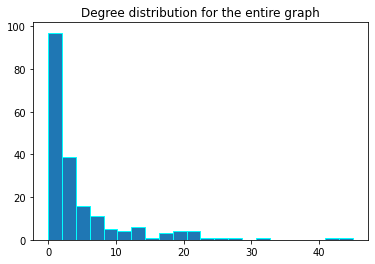

In [80]:
degrees = sorted(d for n, d in G_genre.degree())
out1, out2 = np.histogram(degrees, bins=22)
bin_means = [np.mean(out2[i:(i+2)]) for i in range(len(out2)-1)]
width = out2[1]-out2[0]
plt.bar(bin_means, out1, width = width, edgecolor = "cyan")
plt.title("Degree distribution for the entire graph")
plt.show()

Compared to the artist degree distribution, the genres degree distribution is less uniform. Most genres are played by few and a few popular genres are played by many.

# Genres for each decade

We make a graph of genres, like the one above, but for each decade from the 1950's to the 2010's. We wish to explore any changes in how genres are combined throughout the years. We use the usual networkx tools to generate the graphs. For each graph we count the number of nodes and edges and calculate the average degree.  

In [81]:
def create_genre_decade_graph(deca):
    artists_deca = artists_sub[(artists_sub.Year >= deca) & (artists_sub.Year < (deca+10))]
    genres_decade = artists_deca['genre']
    flat_list_decade = [item for sublist in genres_decade for item in sublist]

    G_genre_deca = nx.Graph()
    G_genre_deca.add_nodes_from(flat_list_decade)
    nodes_in_graph = list(G_genre_deca.nodes())
    N = len(nodes_in_graph)
    for i in range(len(artists_deca)):
        genres_i = artists_deca.genre.iloc[i]
        K = len(genres_i)
        if(K>1):
            for j in range(K):
                for k in range(j+1,K):
                    if(genres_i[j] != genres_i[k]):
                        G_genre_deca.add_edge(genres_i[j], genres_i[k])
    return(G_genre_deca)

In [82]:
def plt_graph_genre(G_genre_deca):
    G_genre_deca_CC = sorted(nx.connected_components(G_genre_deca), key=len, reverse=True)
    G_genre_deca_giant = G_genre_deca.subgraph(G_genre_deca_CC[0])
    d = dict(G_genre_deca_giant.degree)

    positions = forceatlas2.forceatlas2_networkx_layout(G_genre_deca_giant, pos=None, iterations=2000)

    fig=plt.figure(figsize=(13,8), dpi= 100)
    nx.draw_networkx_nodes(G_genre_deca_giant, positions, node_size=[v*4 for v in d.values()])
    nx.draw_networkx_edges(G_genre_deca_giant, positions, alpha = 0.3, edge_color='green')
    plt.axis('off')
    plt.title('Graph of genres')
    plt.show()

Number of nodes: 58
Number of edges: 203
Average degree: 7.0


100%|██████████| 2000/2000 [00:00<00:00, 7847.29it/s]


BarnesHut Approximation  took  0.07  seconds
Repulsion forces  took  0.11  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


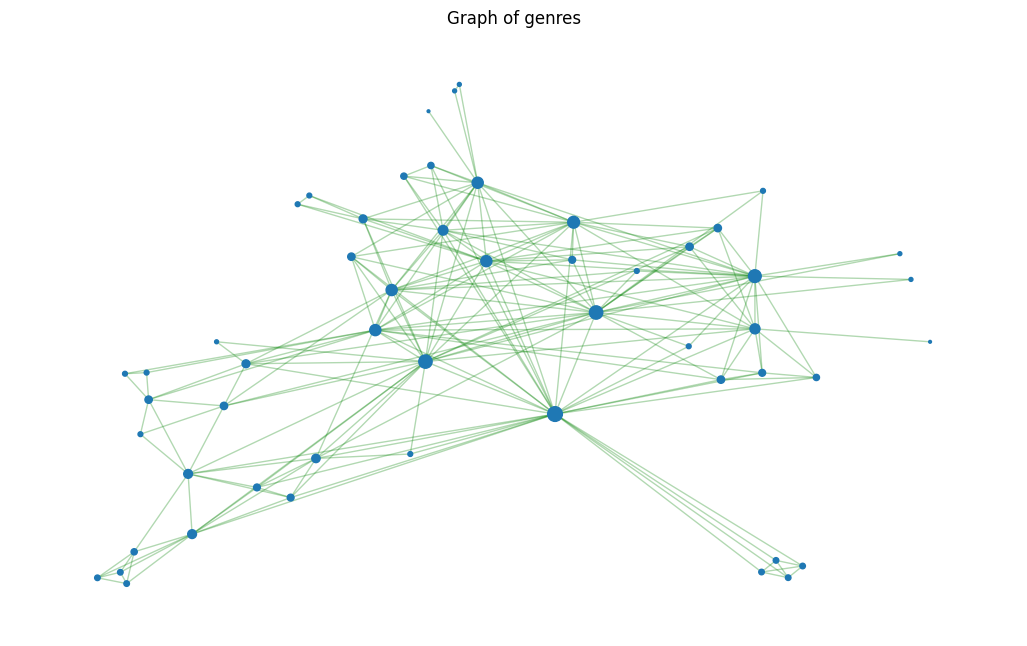

The genres with the largest degree centrality of the decade is:
['pop', 'r&b', 'rock', 'soul', 'gospel']


In [83]:
# Create graph
g_genre_60 = create_genre_decade_graph(1960)

# Stats
stat_genre_60 = get_stats(g_genre_60)

# Plot
plt_graph_genre(g_genre_60)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_60)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 86
Number of edges: 369
Average degree: 8.58


100%|██████████| 2000/2000 [00:00<00:00, 4501.10it/s]


BarnesHut Approximation  took  0.12  seconds
Repulsion forces  took  0.20  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


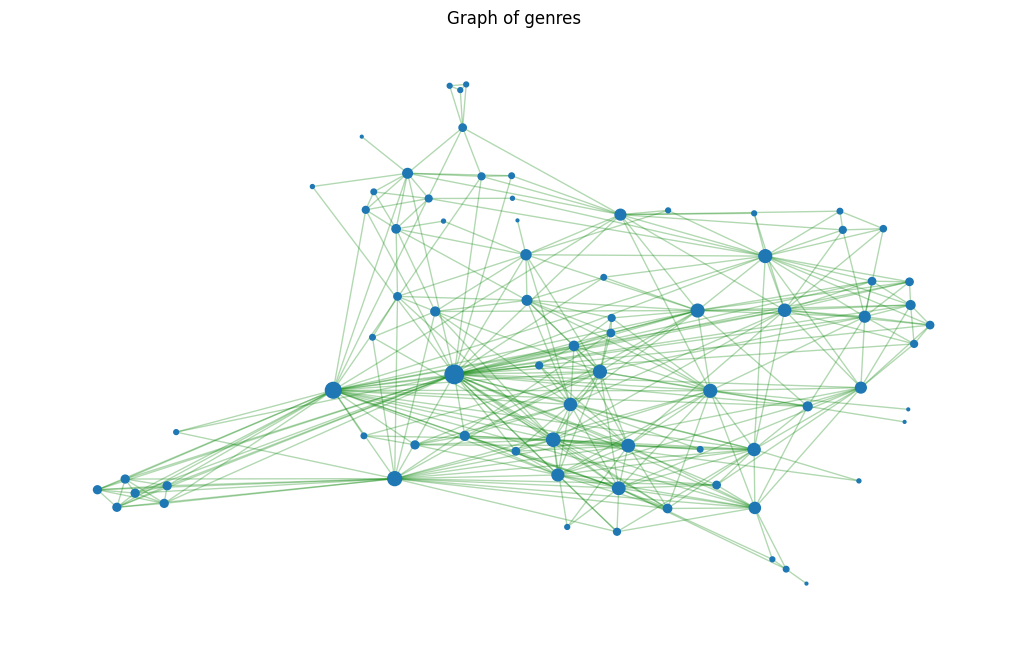

The genres with the largest degree centrality of the decade is:
['rock', 'pop', 'folk', 'r&b', 'pop rock']


In [84]:
# Create graph
g_genre_70 = create_genre_decade_graph(1970)

# Stats
stat_genre_70 = get_stats(g_genre_70)

# Plot
plt_graph_genre(g_genre_70)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_70)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 78
Number of edges: 227
Average degree: 5.82


100%|██████████| 2000/2000 [00:00<00:00, 5628.14it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.15  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


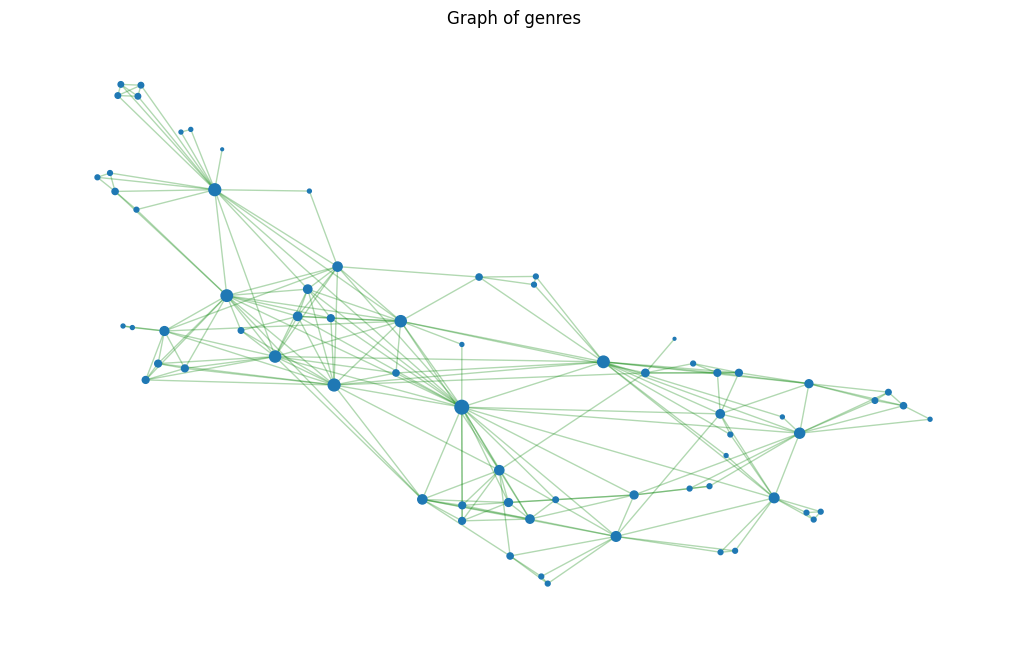

The genres with the largest degree centrality of the decade is:
['rock', 'hip hop', 'soul', 'new wave', 'funk']


In [85]:
# Create graph
g_genre_80 = create_genre_decade_graph(1980)

# Stats
stat_genre_80 = get_stats(g_genre_80)

# Plot
plt_graph_genre(g_genre_80)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_80)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 78
Number of edges: 217
Average degree: 5.56


100%|██████████| 2000/2000 [00:00<00:00, 5644.68it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.15  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


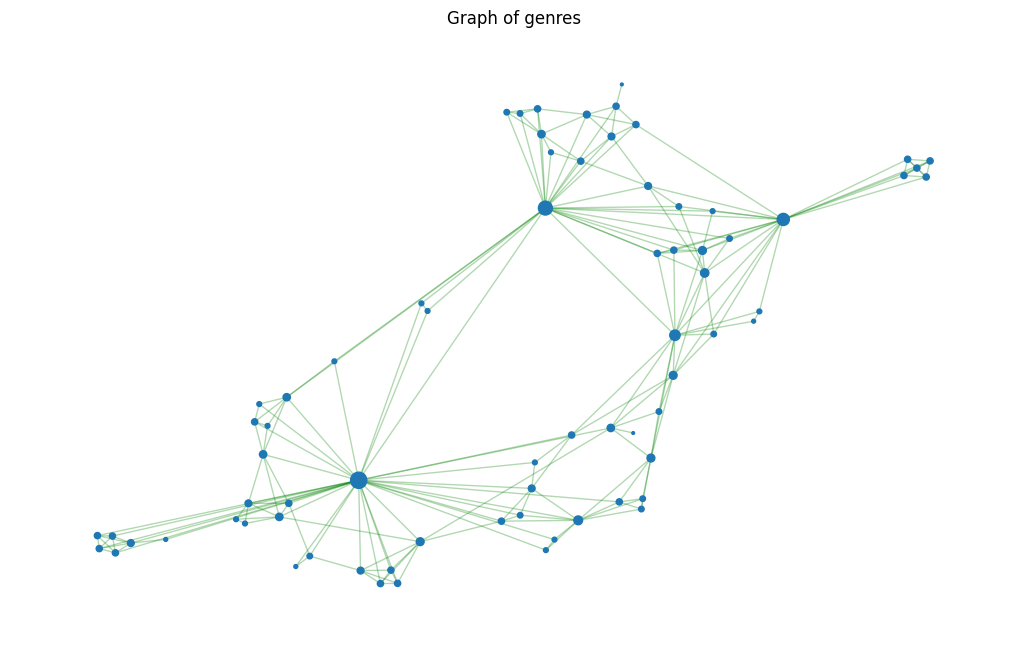

The genres with the largest degree centrality of the decade is:
['alternative rock', 'hip hop', 'r&b', 'pop', 'folk rock']


In [86]:
# Create graph
g_genre_90 = create_genre_decade_graph(1990)

# Stats
stat_genre_90 = get_stats(g_genre_90)

# Plot
plt_graph_genre(g_genre_90)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_90)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 37
Number of edges: 100
Average degree: 5.41


100%|██████████| 2000/2000 [00:00<00:00, 13599.77it/s]

BarnesHut Approximation  took  0.04  seconds
Repulsion forces  took  0.05  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


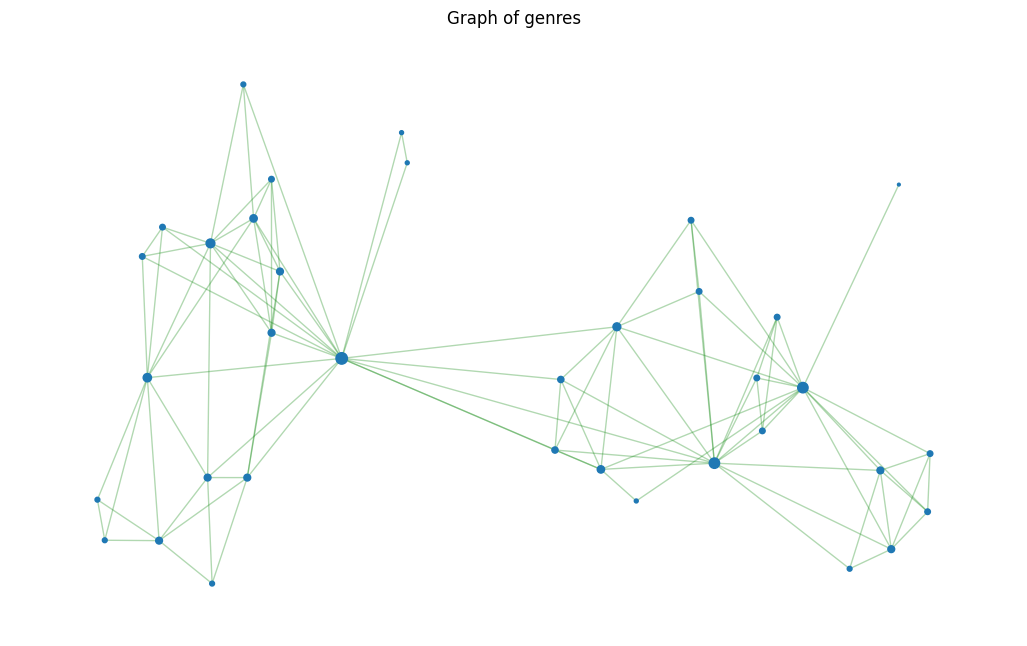

The genres with the largest degree centrality of the decade is:
['pop', 'alternative rock', 'indie rock', 'hip hop', 'r&b']


In [87]:
# Create graph
g_genre_00 = create_genre_decade_graph(2000)

# Stats
stat_genre_00 = get_stats(g_genre_00)

# Plot
plt_graph_genre(g_genre_00)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_00)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 40
Number of edges: 118
Average degree: 5.9


100%|██████████| 2000/2000 [00:00<00:00, 12586.68it/s]

BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.06  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


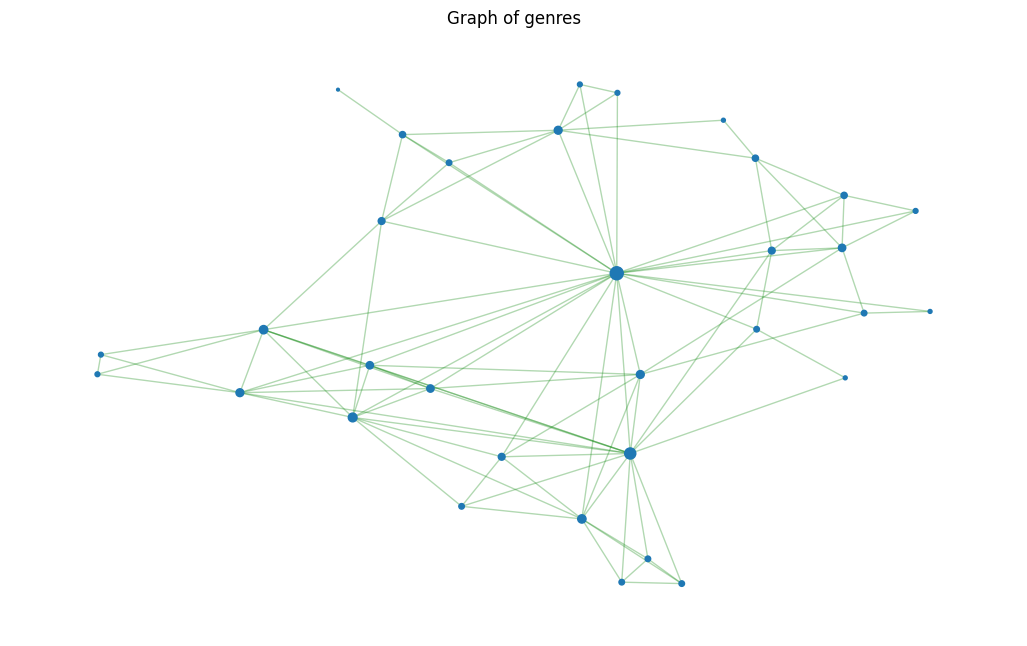

The genres with the largest degree centrality of the decade is:
['pop', 'hip hop', 'pop rock', 'trap', 'disco']


In [88]:
# Create graph
g_genre_10 = create_genre_decade_graph(2010)

# Stats
stat_genre_10 = get_stats(g_genre_10)

# Plot
plt_graph_genre(g_genre_10)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_10)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

In [89]:
stat_decades_genre = pd.DataFrame({'60' : stat_genre_60, '70' : stat_genre_70, 
                             '80' : stat_genre_80, '90' : stat_genre_90, '00' : stat_genre_00, 
                             '10' : stat_genre_10})

In [90]:
new_stat_decades_genre = stat_decades_genre.T

new_stat_decades_genre.index.name = 'decade'
new_stat_decades_genre.reset_index(inplace=True)

new_stat_decades_genre = new_stat_decades_genre.set_axis(['decade', 'n_nodes', 'n_edges', 'avg_deg'], 
                                                         axis=1, inplace=False)
new_stat_decades_genre

decade  n_nodes  n_edges  avg_deg
0     60     58.0    203.0     7.00
1     70     86.0    369.0     8.58
2     80     78.0    227.0     5.82
3     90     78.0    217.0     5.56
4     00     37.0    100.0     5.41
5     10     40.0    118.0     5.90

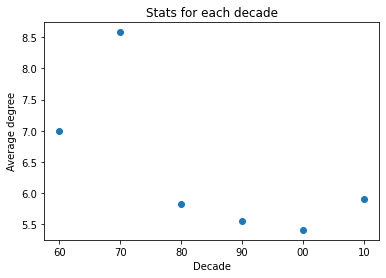

In [91]:
plt.scatter(new_stat_decades_genre.iloc[:,0], new_stat_decades_genre.iloc[:,3])
plt.title('Stats for each decade')
plt.xlabel('Decade')
plt.ylabel('Average degree')
plt.show()

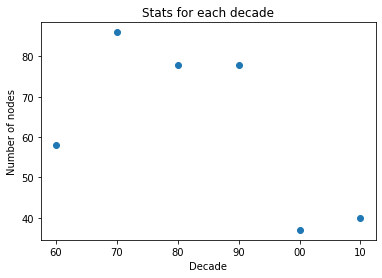

In [92]:
plt.scatter(new_stat_decades_genre.iloc[:,0], new_stat_decades_genre.iloc[:,1])
plt.title('Stats for each decade')
plt.ylabel('Number of nodes')
plt.xlabel('Decade')
plt.show()

The average degree is high in the 60's and 70's. This seem not just to be due to the number of nodes, as the 80's and 90's also contain a high number of nodes.  
This indicates that the best songs of the 60's and 70's combined a larger variety of genres, compared to later years.

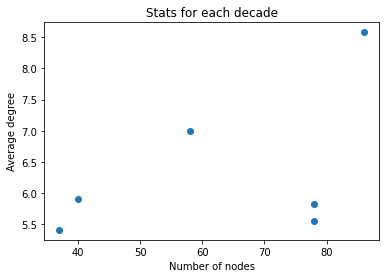

In [93]:
plt.scatter(stat_decades_genre.iloc[0,:], stat_decades_genre.iloc[2,:])
plt.title('Stats for each decade')
plt.xlabel('Number of nodes')
plt.ylabel('Average degree')
plt.show()

The above plots of the degrees and number of nodes in the graphs for each decade showed that the 60's and 70's had a higher degree which didn't seem due to the number of nodes. This indicates that gneres were combined in more ways compared to more recent decates.  

# Lyrics

## Extract lyrics from each artist

Up until now we have see how artists and genres interact with each other through decades. But there is still another important analysis to do when it comes to music: Feelings!
Do artists feel the same things as time goes? or are they inspired by different themes?


In order to do this analysis we have grouped the artists in our 500 top song list into decades. Then we extract five songs per artists and we save it in a txt file goruped by decades. This process takes a long time to run so we will comment out the lines to extract the lyrics and we will zip the txt files. 

In order to extract these lyrics, we had to create a user in the *lyricsgenius* library. Once you are a user, you have your own token and you can find the songs, albums, collaborations... of all artists.

We understand that creating a user is a hassle and also extracting the songs takes more than 6 hours. Therefore, the code will be commented here and the lyrics will be added in the sip file.

The references we followd to extract the songs were:


1. *This link explains how to get into Genius Music API* https://melaniewalsh.github.io/Intro-Cultural-Analytics/04-Data-Collection/07-Genius-API.html


2. *Collect songs function* https://towardsdatascience.com/song-lyrics-genius-api-dcc2819c29

3. *lyrics genius songs* https://pythonrepo.com/repo/johnwmillr-LyricsGenius-python-third-party-apis-wrappers

4. *Nice explanations of genius*
https://melaniewalsh.github.io/Intro-Cultural-Analytics/04-Data-Collection/08-Collect-Genius-Lyrics.html#save-lyrics-to-txt-file



In [94]:
import lyricsgenius
"""token = """ you have to create your own user"""
genius = lyricsgenius.Genius(token)"""
import requests

In [95]:
from bs4 import BeautifulSoup
import re
import lyricsgenius
import requests
from pathlib import Path

In [96]:
def clean_up(song):
    if "Ft" in song:
        ft_ = re.compile(".*(?=\(Ft)")
        song_ft = ft.search(song).group(0)
        clean_song = song_ft.strip()
        clean_song = clean_song.replace("/", "-")
    
    return clean_song

In [97]:
"""def get_lyrics(arr, k, file):  # Write lyrics of k songs by each artist in arr
    c = 0  # Counter
    f = open(file, "w") 
    for name in arr:
        try:
            songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs
            s = [song.lyrics for song in songs]
            f.write("{{"+ name + "}}" )
            f.write("\n \n   <|endoftext|>   \n \n".join(s))  
            c += 1
            print(f, songs, name)
        except: 
            print(f"some exception at {name}: {c}")"""

In [98]:
files =["lyrics_" + str(decade)+".txt" for decade in range(1960, 2020, 10)]


['lyrics_1960.txt',
 'lyrics_1970.txt',
 'lyrics_1980.txt',
 'lyrics_1990.txt',
 'lyrics_2000.txt',
 'lyrics_2010.txt']

In [99]:
"""for i, f in zip(range(1960, 2030, 10), files):
  list_artists  = list(set(all_artists[((all_artists.Year >= (i)) &(all_artists.Year <(i+10)))]["Artist"]))
  print(list_artists)
  #list_artists = list(set(all_artists[((all_artists.Year >= (i)) & (all_artists.Year <(i+10)))]))
  get_lyrics(list_artists, 5, f)"""

'for i, f in zip(range(1960, 2030, 10), files):\n  list_artists  = list(set(all_artists[((all_artists.Year >= (i)) &(all_artists.Year <(i+10)))]["Artist"]))\n  print(list_artists)\n  #list_artists = list(set(all_artists[((all_artists.Year >= (i)) & (all_artists.Year <(i+10)))]))\n  get_lyrics(list_artists, 5, f)'

## Lexical Analysis

One of the main criticism music receives nowadays is that the lexical variety has decreased tremendously. We want to investigate if this is true. Does the number of different decrease over the years? or is it just a feeling?

In order to do so we have used a special library : **Spacy**.
This library works well on Google Colab but it gives problems on Jupyter Notebook. 

This code takes more than three hours to complete, therefore we will add the corresponding csv files.

In [100]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
!pip install vaderSentiment

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 125 kB 4.1 MB/s 


In [101]:
#All the libraries needed along the code will be imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import re as re
import json
import csv
import os
import urllib.request

#Network tools
import networkx as nx
from fa2 import ForceAtlas2
#import powerlaw
import math
from community import community_louvain
import matplotlib.cm as cm

#NLP
import nltk
import string
from collections import Counter
from math import log, ceil
from collections import defaultdict
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

#Sentiment analysis
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [102]:
lyrics_data = []
for f in files: 
### get text file ###
  if(os.path.exists(os.path.join(os.getcwd(), f))):
      with open(f, encoding="windows-1252") as f:
          lyrics_data.append(f.read())
print(files, lyrics_data)

['lyrics_1960.txt', 'lyrics_1970.txt', 'lyrics_1980.txt', 'lyrics_1990.txt', 'lyrics_2000.txt', 'lyrics_2010.txt'] ['{{Jackson 5}}[Intro: Michael Jackson]\nUh-huh huh huh huh\nLet me tell ya now\nUh-huh\n\n[Verse 1: Michael Jackson]\nWhen I had you to myself, I didn\'t want you around\nThose pretty faces always made you stand out in a crowd\nBut someone picked you from the bunch, one glance was all it took\nNow it\'s much too late for me to take a second look\n\n[Chorus: Michael Jackson & Jackson 5]\nOh, baby, give me one more chance (To show you that I love you)\nWon\'t you please let me (Back in your heart)\nOh, darlin\', I was blind to let you go (Let you go, baby)\nBut now since I see you in his arms (I want you back)\n\n[Post-Chorus: Michael Jackson & Jackson 5]\nYes, I do now (I want you back)\nOoh, ooh, baby (I want you back)\nYeah, yeah, yeah, yeah (I want you back)\nNa, na, na, na\n\n[Verse 2: Michael Jackson]\nTryin\' to live without your love is one long sleepless night\nLet

In [103]:
dataset_lyrics = pd.DataFrame(index = ["60's", "70's", "80's", "90's", "00's", "10's"], columns= ["Lyrics" ])

In [104]:
dataset_lyrics.Lyrics = lyrics_data

In [105]:
dataset_lyrics.head()

Lyrics
60's  {{Jackson 5}}[Intro: Michael Jackson]\nUh-huh ...
70's  {{Elvis Costello}}[Verse 1]\nShe may be the fa...
80's  {{Sonic Youth}}[Spoken Intro: Kim Gordon]\nYou...
90's  {{Depeche Mode}}[Verse 1]\nWords like violence...
00's  {{Yeah Yeah Yeahs}}{{Britney Spears}}[Intro]\n...

We are now going to separate the words that appear in songs according to the type of word they are. 

In [106]:
def add_spacy_data(dataset, feature_column):  
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    print("start")
    nlp = spacy.load('en_core_web_sm')
    print("end")
    ##
    for i in range (len(dataset)):
        print("Extracting verbs and topics from decade {}".format(i*10+1960), end = "\r")
        lyrics = dataset.iloc[i][feature_column]
        print("start")
        doc = nlp(lyrics)
        print("end")
        spacy_dataframe = pd.DataFrame()
        for token in doc:
            print("start token")
            if token.lemma_ == "-PRON-":
                    lemma = token.text
            else:
                lemma = token.lemma_
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_,
                "Stop Word": token.is_stop
            }
            print("end token")
            print("start dataframe")
            spacy_dataframe = spacy_dataframe.append(row, ignore_index = True)
        verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
        nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
        corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean)
        print("end for loop")
    dataset['Verbs'] = verbs
    dataset['Nouns'] = nouns
    dataset['Adverbs'] = adverbs
    dataset['Corpus'] = corpus
    return dataset

In [109]:
"""for i, decade in zip(range(len(dataset_lyrics)),[str(i)[2:] for i in range(1960, 2020, 10)]):
  prepared_songs_dataset = add_spacy_data(dataset_lyrics[i:i+1], 'Lyrics')
  prepared_songs_dataset.to_csv("lyrics_division"+ decade +".csv")"""


'for i, decade in zip(range(len(dataset_lyrics)),[str(i)[2:] for i in range(1960, 2020, 10)]):\n  prepared_songs_dataset = add_spacy_data(dataset_lyrics[i:i+1], \'Lyrics\')\n  prepared_songs_dataset.to_csv("lyrics_division"+ decade +".csv")'

In [110]:
words_dataset = pd.DataFrame()

for decade in range(1960, 2020, 10):
  words_dataset = words_dataset.append(pd.read_csv("lyrics_division"+str(decade)[2:]+".csv", index_col="Unnamed: 0"))
words_dataset.head(6)

Lyrics  ...                                             Corpus
60's  {{Jackson 5}}[Intro: Michael Jackson]\nUh-huh ...  ...   Jackson 5 intro Michael Jackson uh huh huh hu...
70's  {{Elvis Costello}}[Verse 1]\nShe may be the fa...  ...   Elvis Costello Verse 1 face forget trace plea...
80's  {{Sonic Youth}}[Spoken Intro: Kim Gordon]\nYou...  ...   Sonic Youth Spoken Intro Kim Gordon hey mean ...
90's  {{Depeche Mode}}[Verse 1]\nWords like violence...  ...   Depeche mode verse 1 word like violence break...
00's  {{Yeah Yeah Yeahs}}{{Britney Spears}}[Intro]\n...  ...   yeah yeah yeahs britney spears intro oh baby ...
10's  {{Eric Church}}{{The Weeknd}}[Intro]\nYeah\nYe...  ...   Eric Church The Weeknd Intro yeah yeah yeah V...

[6 rows x 5 columns]

We are going to plot the number of verbs, nouns and adverbs throughout the decades. We will see if the diversity of vocabulary remains the same or not. 
In a song maybe they repeat the word *play* 20 times. So in order to eliminate these repetitions we will count the **set** of different words.

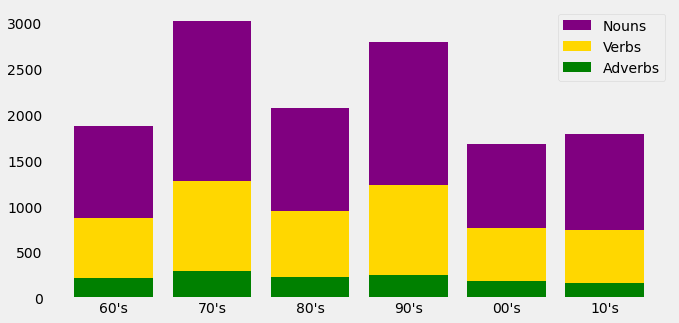

In [111]:
plt.figure(figsize=(10,5))
plt.bar(words_dataset.index, [len(set(words_dataset.Nouns[i].split())) for i in range(len(words_dataset))], color="purple", label="Nouns")
plt.bar(words_dataset.index, [len(set(words_dataset.Verbs[i].split())) for i in range(len(words_dataset))], color="gold", label="Verbs")
plt.bar(words_dataset.index, [len(set(words_dataset.Adverbs[i].split())) for i in range(len(words_dataset))], color="green", label="Adverbs")

plt.xticks(words_dataset.index)
plt.grid()
plt.legend()
plt.show()

The 70’s was by far the greatest; the Shakespeare of the music. In all three types of words, they are the leaders. 90’s follows up close. However, it does not look like we are that far from the 60’s nowadays. Okay, at the beginning of the new century we were a bit lazy, but it looks like it is going up.

But digging a bit deeper we realize that yes, we are way lazier when it comes to create songs. As we said from each artist in the list, we extracted 5 songs. But in the list, we have nearly forty artists in the decade of 2010 whereas for the 60’s we barely have twenty. So, with half the songs, we get the same amount of vocabulary… Got to put our records on!

## Word Clouds
To make the lexical analysis a bit more visual and also see how do singers feelings change over time, we are going to plot some word clouds for each decade and for each type of word. 


In [113]:
words_dataset["Noun count"] = [len(words_dataset.Nouns[i].split()) for i in range(len(words_dataset))]
words_dataset["Verbs count"] = [len(words_dataset.Verbs[i].split()) for i in range(len(words_dataset))]
words_dataset["Adverbs count"] = [len(words_dataset.Adverbs[i].split()) for i in range(len(words_dataset))]
                                                                                        
words_dataset["Noun count unique"] = [len(set(words_dataset.Nouns[i].split())) for i in range(len(words_dataset))]
words_dataset["Verbs count unique"] = [len(set(words_dataset.Verbs[i].split())) for i in range(len(words_dataset))]
words_dataset["Adverbs count unique"] = [len(set(words_dataset.Adverbs[i].split())) for i in range(len(words_dataset))]

# Calculate IDF:
count_nouns = defaultdict(float) 
count_verbs = defaultdict(float) 
count_adverbs = defaultdict(float) 

# Define TC_IDF
def TC_IDF_for_decade(token):
    counts_hylian = Counter(token) # Calculate TC for the race
    tc_idf = {k:(idf_ceil[k]*v) for (k,v) in counts_hylian.items()} # TC_IDF
    
    # Make it into a single string where each word occure correspondingly to its TC_IDF:
    string_rep = [(k+' ')*v for (k,v) in tc_idf.items()]
    string_rep_2 = [w for w in string_rep if w != '']
    decade_string = ''.join(string_rep_2)
    return(decade_string)


#### Nouns

lyrics_1960.txt


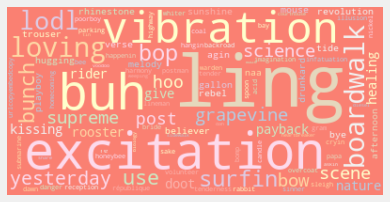

lyrics_1970.txt


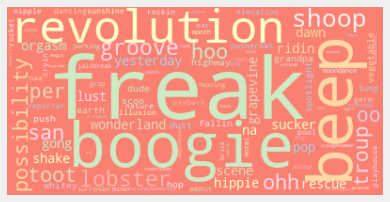

lyrics_1980.txt


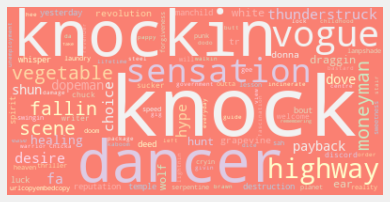

lyrics_1990.txt


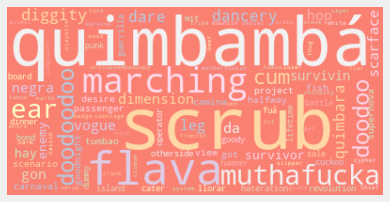

lyrics_2000.txt


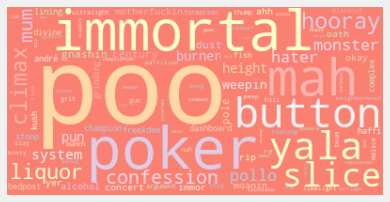

lyrics_2010.txt


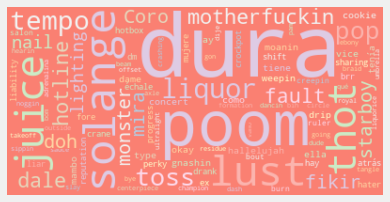

In [119]:
# Calculate IDF:
count_nouns = defaultdict(float) 
words = [list(set(words_dataset.Nouns[i].split())) for i in range(len(words_dataset))]

for decade in words:
    for w in decade:
      count_nouns[w] += 1
idf_ceil = {k:ceil(log(5/v)) for (k,v) in count_nouns.items()}

# Calculate TD_IDF
td_idf = []
for decade in words_dataset["Nouns"]:
  td_idf.append(TC_IDF_for_decade(decade.split()))

strings = td_idf
titles = files
counter = 0
for i in strings:
  # Create a word cloud image:
  wordcloud = WordCloud(collocations = False, max_words=100,  background_color='salmon', colormap='Pastel1').generate(i)

  # Display the image:
  print(titles[counter])
  plt.figure()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  counter += 1

#### Verbs

lyrics_1960.txt


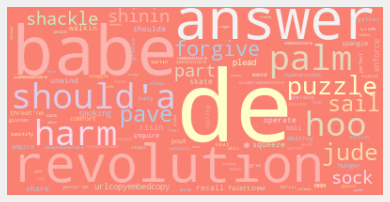

lyrics_1970.txt


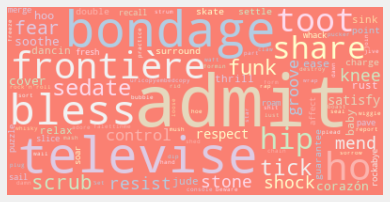

lyrics_1980.txt


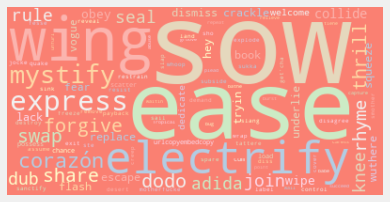

lyrics_1990.txt


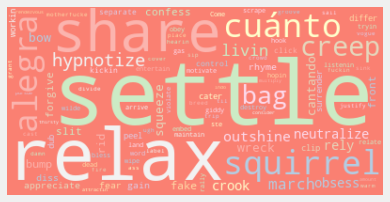

lyrics_2000.txt


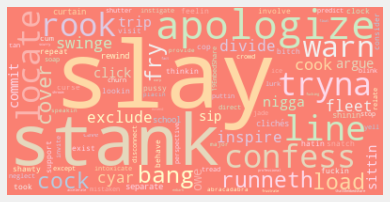

lyrics_2010.txt


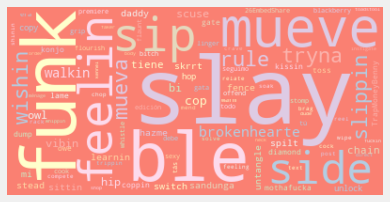

In [115]:
# Calculate IDF:
count_verbs = defaultdict(float) 
words = [list(set(words_dataset.Verbs[i].split())) for i in range(len(words_dataset))]

for decade in words:
    for w in decade:
      count_verbs[w] += 1
idf_ceil = {k:ceil(log(5/v)) for (k,v) in count_verbs.items()}

# Calculate TD_IDF
td_idf = []
for decade in words_dataset["Verbs"]:
  td_idf.append(TC_IDF_for_decade(decade.split()))

strings = td_idf
titles = files
counter = 0
for i in strings:
  # Create a word cloud image:
  wordcloud = WordCloud(collocations = False, max_words=100,  background_color='salmon', colormap='Pastel1').generate(i)

  # Display the image:
  print(titles[counter])
  plt.figure()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  counter += 1

#### Adverbs 

lyrics_1960.txt


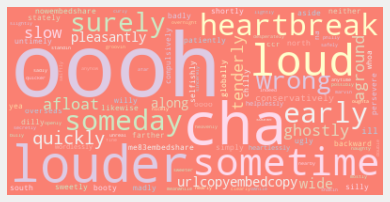

lyrics_1970.txt


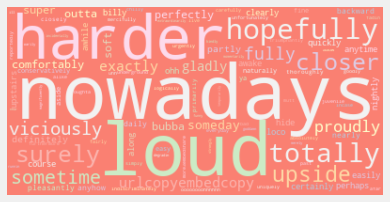

lyrics_1980.txt


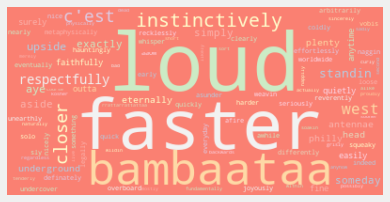

lyrics_1990.txt


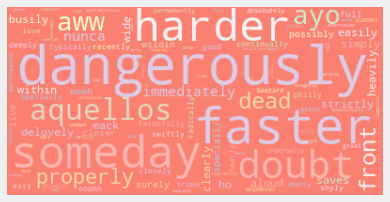

lyrics_2000.txt


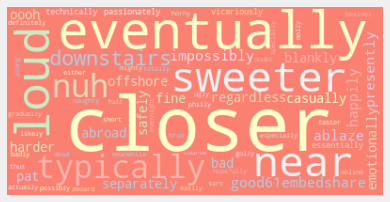

lyrics_2010.txt


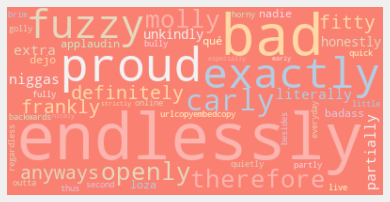

In [116]:
# Calculate IDF:
count_adverbs = defaultdict(float) 
words = [list(set(words_dataset.Adverbs[i].split())) for i in range(len(words_dataset))]

for decade in words:
    for w in decade:
      count_adverbs[w] += 1
idf_ceil = {k:ceil(log(5/v)) for (k,v) in count_adverbs.items()}

# Calculate TD_IDF
td_idf = []
for decade in words_dataset["Adverbs"]:
  td_idf.append(TC_IDF_for_decade(decade.split()))

strings = td_idf
titles = files
counter = 0
for i in strings:
  # Create a word cloud image:
  wordcloud = WordCloud(collocations = False, max_words=100,  background_color='salmon', colormap='Pastel1').generate(i)

  # Display the image:
  print(titles[counter])
  plt.figure()
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  counter += 1

In our web page we describe each decade together with the social and cultural movements of the decade. This, together with the genre analysis explains the difference of vocabulary found in the word clouds. 

# Sentiment analysis for each decade

Basic Idea:

In this part, we're interested to know how the artists' feeling changed in the past few decades. The main task is to use two different sentiment analysis methods to get a sentiment score. In each method, the higher the score, the more positive the artists' feelings are.

Tools: 

1. LabMT: LabMT is a lexicon based method, it uses a dictionary where words are mapped with their respective level of happiness.

   To get the sentiment score, we need to:  

   1. Get a list of tokens as input, 
   2. Then count the number of the words that are also in the LabMT file. 
   3. Next, we multiply the frequency of the words and the related happiness number and sum them up. 
   4. Last step, divide the sum by the total number of the list of token. 

2. Vader: Vader is a rule based method, based method where each sentence is given a  sentiment score.

   To get the sentiment score, we need to:
   1. Input a list of sentences
   2. Apply the function in VADER library to get the sentiment of each sentence. 
   3. Then sum up the sentiment score
   4. Divided it by the number of sentences.
   
3. Regular Expression: Regular expression is a sequence of characters that specifies a search pattern. In our case, we want to use it to remove something we don't need in our lyrics file. For example, we need to remove the square brackets'[]' and curly brackets'{}',as well as all the content inside them.

   In order to do this, we create the two regular expression partterns:
   1. pattern1=r'\[.+\]|\s\-.+'
   2. pattern2=r'\{.+\}|\s\-.+'
   
   Then use re.sub() function to remove them.

## `1. LabMT`

In [121]:
# get the information from LabMT
LabMT_path = 'LabMT.txt'
LabMT_dic = {}
with open(LabMT_path,'r') as f:
    # word and happiness_avg start from line 5
    for i in range(4):
        next(f)
    for line in f:
        content = line.split('\t')
        word = content[0]
        happiness_avg = content[2]
        LabMT_dic[word] = float(happiness_avg)

In [122]:
def load_txt_and_clean_it(path):
    data=[]
    # pattern for [] and all the content inside it 
    pattern1=r'\[.+\]|\s\-.+' 
    # pattern for {} and all the content inside it 
    pattern2=r'\{.+\}|\s\-.+'

    with open(path,encoding='gb18030',errors='ignore') as f:
        for line in f:
            # remove [] and all the content inside it 
            line_without_pattern1 = re.sub(pattern1,"",line)
            # remove {} and all the content inside it 
            line_clean = re.sub(pattern2,"",line_without_pattern1)
            # remove blank lines and Concatenate into a new list
            data.append(line_clean.strip())
    return data

In [123]:
## get the list of token from preprocessed file
def get_list_of_token(dialogue):
    token = nltk.word_tokenize(str(dialogue))  # tokenlize sentence into words
    token_without_punctuation = [w for w in token if w.isalpha()] # remove punctuation
    list_of_token = [w.lower() for w in token_without_punctuation] # set to lower words
    #list_of_token = [w.WordNetLemmatizer() for w in token_lower] # lemmatize the words
    return list_of_token

In [124]:
#  calculate sentiment for one character 
def sentiment_calculator(list_of_token):
    # get the frequency of the words in the token
    freq_dict = nltk.FreqDist(list_of_token)
    sum_sentiment = 0
    freq_dict_in_LabMT = {}
    # we leave out those words which are not in the LabMT file
    freq_dict_in_LabMT = {k: v for k, v in freq_dict.items() if k in LabMT_dic.keys()}    
    # calculate sentiment for each charactor
    for word in freq_dict_in_LabMT.keys():
        sum_sentiment += freq_dict_in_LabMT[word] * LabMT_dic[word]  
    freq = sum(freq_dict_in_LabMT.values())
    sentiment = sum_sentiment/freq
    return sentiment

In [125]:
## LabMT sentiment score calculator
def Sentiment_score_LabMT(path):
    # get lyrics text 
    lyrics = load_txt_and_clean_it(path)
    list_of_token = []
    # get list_of_token
    list_of_token = get_list_of_token(lyrics)
    # calculate sentiment_score_LabMT
    sentiment_score_LabMT = sentiment_calculator(list_of_token)
    return sentiment_score_LabMT

In [127]:
## sentiment score in the 60s
path = 'lyrics_1960.txt'
sentiment_score_LabMT_60s = Sentiment_score_LabMT(path)
print("The sentiment score in the 60s is:",sentiment_score_LabMT_60s)

The sentiment score in the 60s is: 5.570109276503149


In [126]:
## sentiment score in the 70s
path = 'lyrics_1970.txt'
sentiment_score_LabMT_70s = Sentiment_score_LabMT(path)
print("The sentiment score in the 70s is:",sentiment_score_LabMT_70s)

The sentiment score in the 70s is: 5.536344713382353


In [128]:
## sentiment score in the 80s
path = 'lyrics_1980.txt'
sentiment_score_LabMT_80s = Sentiment_score_LabMT(path)
print("The sentiment score in the 80s is:",sentiment_score_LabMT_80s)

The sentiment score in the 80s is: 5.525788704743665


In [129]:
## sentiment score in the 90s
path = 'lyrics_1990.txt'
sentiment_score_LabMT_90s = Sentiment_score_LabMT(path)
print("The sentiment score in the 80s is:",sentiment_score_LabMT_90s)

The sentiment score in the 80s is: 5.487939350848654


In [130]:
## sentiment score in the 00s
path = 'lyrics_2000.txt'
sentiment_score_LabMT_00s = Sentiment_score_LabMT(path)
print("The sentiment score in the 00s is:",sentiment_score_LabMT_00s)

The sentiment score in the 00s is: 5.507409169662029


In [131]:
## sentiment score in the 10s
path = 'lyrics_2010.txt'
sentiment_score_LabMT_10s = Sentiment_score_LabMT(path)
print("The sentiment score in the 00s is:",sentiment_score_LabMT_10s)

The sentiment score in the 00s is: 5.522421719710956


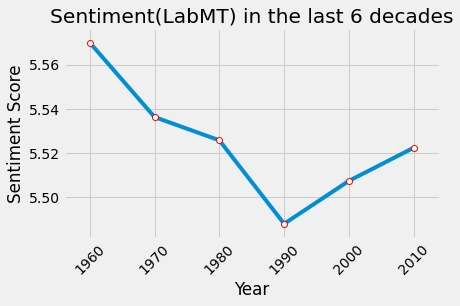

In [132]:
## line chart to show how the sentiment(calculated using LabMT) changed in the last 6 decades
years = ['1960', '1970', '1980', '1990', '2000', '2010']
x = range(len(years))
y = [sentiment_score_LabMT_60s, sentiment_score_LabMT_70s, sentiment_score_LabMT_80s, 
     sentiment_score_LabMT_90s, sentiment_score_LabMT_00s, sentiment_score_LabMT_10s]
plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.xticks(x, years, rotation=45)
plt.margins(0.08)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("Year") 
plt.ylabel("Sentiment Score") 
plt.title("Sentiment(LabMT) in the last 6 decades") 
plt.show()


## `2. Vader`

In [133]:
## Vader sentiment score calculator
def Sentiment_score_Vader(path):
    # get lyrics text
    lyrics = load_txt_and_clean_it(path)
    
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sentence_num = 0
    sum_compound = 0
    for sentence in lyrics:
        # get sentiment score from each sentence
        vs = analyzer.polarity_scores(sentence)
        sentence_num += 1
        sum_compound += vs['compound']
    # calculate sentiment_score_Vader
    sentiment_score_Vader = sum_compound / sentence_num
    return sentiment_score_Vader

In [134]:
## sentiment score in the 60s 
path = 'lyrics_1960.txt'
sentiment_score_Vader_60s = Sentiment_score_Vader(path)
print("The sentiment score in the 60s is:",sentiment_score_Vader_60s)

The sentiment score in the 60s is: 0.06489051370531893


In [135]:
## sentiment score in the 70s 
path = 'lyrics_1970.txt'
sentiment_score_Vader_70s = Sentiment_score_Vader(path)
print("The sentiment score in the 70s is:",sentiment_score_Vader_70s)

The sentiment score in the 70s is: 0.04999704196369531


In [136]:
## sentiment score in the 80s 
path = 'lyrics_1980.txt'
sentiment_score_Vader_80s = Sentiment_score_Vader(path)
print("The sentiment score in the 80s is:",sentiment_score_Vader_80s)

The sentiment score in the 80s is: 0.044378708463949694


In [137]:
## sentiment score in the 90s 
path = 'lyrics_1990.txt'
sentiment_score_Vader_90s = Sentiment_score_Vader(path)
print("The sentiment score in the 90s is:",sentiment_score_Vader_90s)

The sentiment score in the 90s is: 0.0314717818642996


In [138]:
## sentiment score in the 00s 
path = 'lyrics_2000.txt'
sentiment_score_Vader_00s = Sentiment_score_Vader(path)
print("The sentiment score in the 00s is:",sentiment_score_Vader_00s)

The sentiment score in the 00s is: 0.02854003343621391


In [139]:
## sentiment score in the 10s 
path = 'lyrics_2010.txt'
sentiment_score_Vader_10s = Sentiment_score_Vader(path)
print("The sentiment score in the 10s is:",sentiment_score_Vader_10s)

The sentiment score in the 10s is: 0.025761265909872676


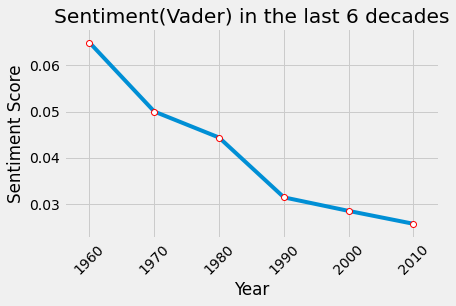

In [140]:
## line chart to show how the sentiment changed in the last 6 decades
years = ['1960', '1970', '1980', '1990', '2000', '2010']
x = range(len(years))
y = [sentiment_score_Vader_60s, sentiment_score_Vader_70s, sentiment_score_Vader_80s, 
     sentiment_score_Vader_90s, sentiment_score_Vader_00s, sentiment_score_Vader_10s]
plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.xticks(x, years, rotation=45)
plt.margins(0.08)
plt.subplots_adjust(bottom=0.15)
plt.xlabel("Year") 
plt.ylabel("Sentiment Score") 
plt.title("Sentiment(Vader) in the last 6 decades") 
plt.show()

Outcome:
    
As from the sentiment score and the two charts, we can see the overal trend is that artists felt more positive in the past. But there are something different in the two charts: in the LabMT sentiment analysis chart, the score goes higher from 1990 to 2010, which is opposite while we use Vader.

The difference comes from the princples of the two methods. A rule based method(Vader) takes into account not just the word but also the context. This is a better approach than just taking one word like it is done in the dictionary-based method(LabMT).

From the overall downward trend and the negative sentiment of song lyrics in the last 10 to 20 years, we can also see that Vader is a better choice.

Those links explain:

How to use LabMT sentiment analysis. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752

How to use Vader sentiment analysis. https://github.com/cjhutto/vaderSentiment#code-examples

How to use relular expressions. https://developers.google.com/edu/python/regular-expressions


# Conclusions
Decade division, artist's wiki extraction, the searching of songs, its corresponding sentiment... was quite tough but we are happy with the results in the end. Also seeing the relationship between music, vocabulary and the social and cultural movements of the year was quite long but it gave the project some structure and a focus. 

Now that we have finished the project we think that there are a few changes that we could do to make it better:
1. Instead of the top 500 over the last years, we could have got the top 100 of each year over the last 50 years. The dataset would have been much longer but the sentiment analysis much more accurate.

2. In the word cloud section, not just count the number of times a word is repeated in the decade, but the number of songs it is present in. For example, “Knock” and “Knocking” in the 1980s is mostly due to the song “knocking on heaven’s door”, where he repeats these words many times. But this does not mean the knocking was a popular term in the 80's.

3. One things that we would have liked to do was to find patterns in nodes; see if Frank Sinatra's node was similar to Ed Sheeran or Shawn Mendez's. We did not have enough data for this. Maybe if we had got the 100 songs per year dataset it would have been possible but if with just 500 hundred songs some parts took hours to do then that many songs might have just made our computers explode.

So it is time to conclude. What will this new decade bring us? Has COVID made songs happier? Will lockdown start to appear in our Word Clouds? Will we have a Taylor Swift to bring New wave back again for example? Will we change Queen B or Princess Ri?

Many questions, but hopefully many songs to answer them!